# Importing modules, packages, processed and unprocessed data

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy as hm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

2023-10-24 16:53:28.574342: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 16:53:28.576236: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 16:53:28.738253: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 16:53:28.739387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 16:53:34.683710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
from matplotlib.pyplot import rc_context

In [ ]:
sc.settings.verbosity = 4
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor='white', format = 'pdf', vector_friendly = True)

scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.22.4 scipy==1.10.1 pandas==1.4.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 louvain==0.7.1 pynndescent==0.5.6


# Analysis in R itself

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=300)

import seaborn as sns
sns.set(style="whitegrid")
%load_ext rpy2.ipython

In [ ]:
%%R
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.0                         
year           2021                        
month          05                          
day            18                          
svn rev        80317                       
language       R                           
version.string R version 4.1.0 (2021-05-18)
nickname       Camp Pontanezen             


## Functions to make it pretty, courtesy of apposada (Github)  

In [ ]:
%%R
sourceFolder <- function(folder, recursive = FALSE, ...)
{
    files <- list.files(folder, pattern = "[.][rR]$",
                        full.names = TRUE, recursive = recursive)
    if (!length(files))
        stop(simpleError(sprintf('No R files in folder "%s"', folder)))
    src <- invisible(lapply(files, source, ...))
    message(sprintf('%s files sourced from folder "%s"', length(src), folder))
}

sourceFolder(
  "/mnt/sda/alberto/projects/dev/comparABle/code/functions/", #change for definitive path once its final
  recursive = TRUE
  )

R[write to console]: Loading required package: ComplexHeatmap

R[write to console]: Loading required package: grid

R[write to console]: ========================================
ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


R[write to console]: Loading required package: circlize

R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=cir

In [ ]:
%%R
#loading packages
options(scipen=999)
library(vroom)
library(reshape2)
library(ComplexHeatmap)
library(circlize)
library(viridis)
library(colorspace)
library(RColorBrewer)
library(dplyr)
library(DESeq2)
library(plyr)
library(dplyr)
library(tidyr)
library(igraph)
library(tidyverse)
library(ggrepel)
library(ggplot2)
library(data.table)
library(topGO)

R[write to console]: Loading required package: GenomicRanges

R[write to console]: Loading required package: GenomeInfoDb

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘matrixStats’


R[write to console]: The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


R[write to console]: The following object is masked from ‘package:dplyr’:

    count


R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, c

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
✔ purrr     1.0.1     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()        masks igraph::%--%()
✖ lubridate::%within%()    masks IRanges::%within%()
✖ plyr::arrange()          masks dplyr::arrange()
✖ tibble::as_data_frame()  masks igraph::as_data_frame(), dplyr::as_data_frame()
✖ stringr::boundary()      masks graph::boundary()
✖ readr::col_character()   masks vroom::col_character()
✖ readr::col_date()        masks vroom::col_date()
✖ readr::col_datetime()    masks vroom::col_datetime()
✖ readr::col_double()      masks vroom::col_double()
✖ readr::col_factor()      masks vroom::col_factor()
✖ readr::col_guess()       masks vroom::col_guess()
✖ readr::col_integer()     masks vroom::col_integer()
✖ readr::col_logical()     masks vroom::col_logical()
✖ readr

R[write to console]: data.table 1.14.8 using 32 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


R[write to console]: The following object is masked from ‘package:purrr’:

    transpose


R[write to console]: The following object is masked from ‘package:SummarizedExperiment’:

    shift


R[write to console]: The following object is masked from ‘package:GenomicRanges’:

    shift


R[write to console]: The following objects are masked from ‘package:reshape2’:

    dcast, melt


R[write to console]: The following object is masked from ‘package:IRanges’:

    shift


R[write to console]: The following objects are masked from ‘package:S4Vectors’:

    first, second


R[write to console]: The following objects are masked from ‘package:dplyr’:

    between, fir

In [ ]:
%%R
#setting directories
dir <- '/mnt/sda/david/hydractinia/wgcna/'
fcha <- function(){ gsub("-","",Sys.Date()) }

setwd(dir)

In [ ]:
%%R
#Loading the objects saved in the last session
load('/mnt/sda/david/hydractinia/wgcna/20230817_data_load.rda')

In [ ]:
%%R
head(hysim_ctypes_col)

         cluster     col
1  04_prog_early #CCCCCC
2  08_prog_mixed #666666
3 14_prog_i-cell #E0E0E0
4       06_gmt_1 #999999
5       34_gmt_2 #333333
6        00_ep_1 #2196F3


# WGCNA counts per million

## Setting up

In [ ]:
%%R
#to install the necessary packages
#if (!require("BiocManager", quietly = TRUE))
#       install.packages("BiocManager")
#BiocManager::install(version = "3.14")
#BiocManager::install(c("GO.db", "preprocessCore", "impute") )
#install.packages('WGCNA')

NULL


In [ ]:
%%R
setwd(dir)
library(WGCNA)
library(DESeq2)
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE)
# pre-cleanup
rm(list=ls(pattern="wg"))

R[write to console]: Loading required package: dynamicTreeCut

R[write to console]: Loading required package: fastcluster

R[write to console]: 
Attaching package: ‘fastcluster’


R[write to console]: The following object is masked from ‘package:stats’:

    hclust


R[write to console]: 
Attaching package: ‘WGCNA’


R[write to console]: The following object is masked from ‘package:IRanges’:

    cor


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    cor


R[write to console]: The following object is masked from ‘package:stats’:

    cor




## Data preparation

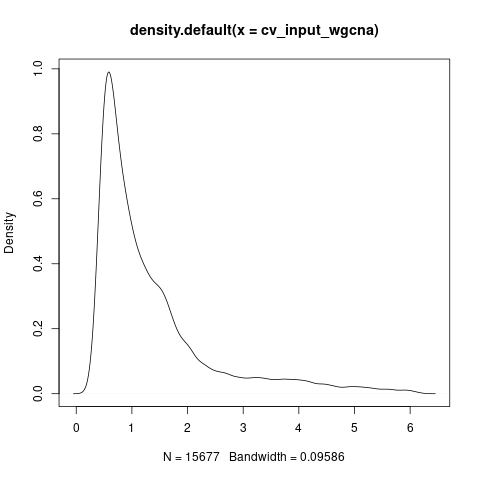

In [ ]:
%%R
input_wgcna <-
  hysim_cpm[,1:38]

cv_input_wgcna <-
  apply(input_wgcna, 1, function(x)
    sd(x) / mean(x))
cv_input_wgcna <- cv_input_wgcna[complete.cases(cv_input_wgcna)]
plot(density(cv_input_wgcna)) # check visually the cutoff of coefficient of variation

## The whole data processing after curating and inspecting

In [ ]:
%%R
names(hysim_cpm)

 [1] "04_prog_early"     "08_prog_mixed"     "14_prog_i-cell"   
 [4] "06_gmt_1"          "34_gmt_2"          "00_ep_1"          
 [7] "01_ep_2"           "07_ep_3"           "19_ep_4"          
[10] "23_ep_5"           "28_ep_6"           "30_ep_7"          
[13] "35_ep_8"           "37_ep_9"           "09_Cdpi2+"        
[16] "13_Cdpi3+"         "36_Cdpi1+"         "02_em_1"          
[19] "03_em_2"           "05_em_3"           "11_em_Shem+"      
[22] "20_em_4"           "31_em_5"           "21_gl_Rsp+"       
[25] "17_gl_Nas4+"       "22_gl_Nas14+"      "24_gl_Chitinase2+"
[28] "32_gl_4"           "10_nc_Tchh1+"      "15_nc_Tchh2+"     
[31] "12_nb_1"           "18_nb_Hrnr+"       "25_nb_3"          
[34] "16_ne_Rf/Glw+"     "26_ne_Inv+"        "27_ne_Fax+"       
[37] "29_ne_Pkdrej+"     "33_ne_4"          


In [ ]:
%%R
cv_input_wgcna <-
  cv_input_wgcna[cv_input_wgcna > 1]

# Defining the datExpr object
datExpr = as.data.frame(
  scale(
    t(
      input_wgcna[
        rownames(input_wgcna) %in% names(cv_input_wgcna),
        ]
      )
    )
  ) # perhaps I should not scale them.

rownames(datExpr) <- colnames(hysim_cpm)
nGenes <- ncol(datExpr)
nSamples <- nrow(datExpr)

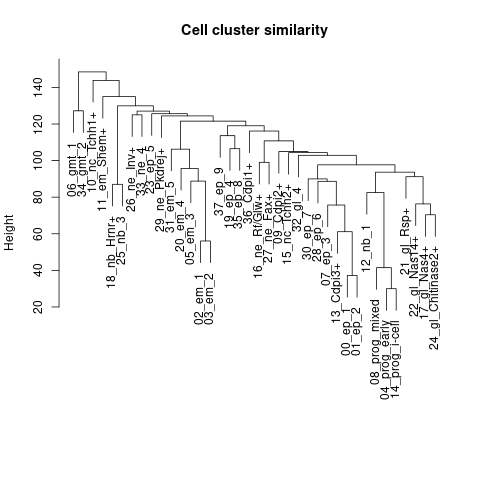

In [ ]:
%%R
sampleTree <- hclust(dist(datExpr), method = "average")

plot(
  sampleTree,
  main = "Cell cluster similarity",
  sub = "",
  xlab = ""
)
#here you can sort out small clusters

## Power estimation

In [ ]:
%%R
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to = 20, by = 2))
powers

 [1]  1  2  3  4  5  6  7  8  9 10 12 14 16 18 20


In [ ]:
%%R
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)

pickSoftThreshold: will use block size 5928.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 5928 of 7547
   ..working on genes 5929 through 7547 of 7547
   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.155 -1.590          0.913  1190.0   1190.00   1990
2      2    0.228 -1.050          0.891   381.0    363.00    781
3      3    0.472 -0.917          0.896   194.0    175.00    476
4      4    0.695 -0.905          0.937   127.0    104.00    364
5      5    0.794 -1.040          0.966    93.0     71.20    317
6      6    0.810 -1.090          0.949    73.0     51.90    284
7      7    0.829 -1.140          0.940    59.7     41.00    257
8      8    0.866 -1.140          0.950    50.2     31.90    236
9      9    0.887 -1.140          0.952    43.2     25.30    218
10    10    0.900 -1.130          0.945    37.8     20.40    204
11    12    0.901 -1.130          0.916    30.0     13.50    181
12    14    0.923

In [ ]:
%%R
sft

$powerEstimate
[1] 8

$fitIndices
   Power  SFT.R.sq      slope truncated.R.sq    mean.k.   median.k.    max.k.
1      1 0.1548832 -1.5913936      0.9127755 1194.43202 1192.338434 1992.8424
2      2 0.2275004 -1.0450228      0.8906244  381.06603  363.191972  781.1198
3      3 0.4715294 -0.9173775      0.8960696  194.17822  175.489799  475.5395
4      4 0.6948416 -0.9045743      0.9369266  126.54022  103.765321  364.1856
5      5 0.7939065 -1.0352731      0.9655061   92.99383   71.151014  316.9838
6      6 0.8102213 -1.0949738      0.9485588   72.96687   51.905142  283.5032
7      7 0.8290585 -1.1361774      0.9399513   59.66080   40.999204  257.3655
8      8 0.8657577 -1.1370287      0.9503631   50.20861   31.939793  236.0912
9      9 0.8868339 -1.1362467      0.9521571   43.17772   25.322883  218.2792
10    10 0.9000654 -1.1335271      0.9445272   37.76606   20.369804  203.8268
11    12 0.9013572 -1.1298250      0.9161462   30.03211   13.542967  180.6122
12    14 0.9232419 -1.1001734 

According to the tutorial in WGCNA, We would pick the first power after it has reached saturation

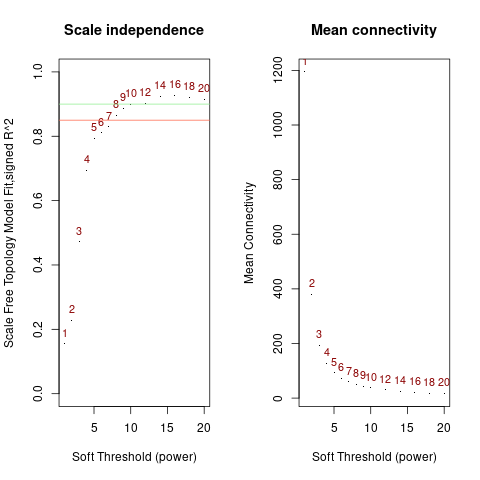

In [ ]:
%%R
# Plot the results:
par(mfrow = c(1, 2))

cex1 = 0.9

# Scale-free topology fit index as a function of the soft-thresholding power
plot(
  sft$fitIndices[, 1],
  -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
  ylim = c(0,1),
  xlab = "Soft Threshold (power)",
  ylab = "Scale Free Topology Model Fit,signed R^2",
  pch = ".",
  main = paste("Scale independence")
)

text(
  sft$fitIndices[, 1],
  -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
  pos = 3,
  labels = powers,
  cex = cex1,
  col = "darkred"
)

# this line corresponds to using an R^2 cut-off of h
abline(h = 0.85, col = "tomato")
abline(h = 0.9, col = "lightgreen")

# Mean connectivity as a function of the soft-thresholding power
plot(
  sft$fitIndices[, 1],
  sft$fitIndices[, 5],
  xlab = "Soft Threshold (power)",
  ylab = "Mean Connectivity",
  pch = ".",
  main = paste("Mean connectivity")
)
text(
  sft$fitIndices[, 1],
  sft$fitIndices[, 5],
  labels = powers,
  pos = 3,
  cex = cex1,
  col = "darkred"
)

## Adjacency matrix

###  Through the eyes of WGCNA, when two genes are adjacent, they show similar leveles of co-regulation. This co-regulation is characterised by high values of Pearson Correlation's test and put into a matrix

In [ ]:
%%R
softPower = 14 # this is defined by visually inspect the scale independence graph

adjacency = adjacency(datExpr, power = softPower)
dim(adjacency)

[1] 7547 7547


## Topologically Overlap Matrix

In [ ]:
%%R
# Turn adjacency into topological overlap
TOM = TOMsimilarity(adjacency)
rownames(TOM)<- rownames(adjacency)
colnames(TOM)<- colnames(adjacency)
dissTOM <- 1 - TOM

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


## Clustering and module detection

In [ ]:
%%R
geneTree = hclust(as.dist(dissTOM), method = "average")

In [ ]:
%%R
#run iterations and report
minModuleSize <- 75# check this as well

dynamicMods <- cutreeDynamic(#check documentation
  dendro = geneTree,
  distM = dissTOM,
  deepSplit = 4,# increase up to 4
  pamRespectsDendro = FALSE,
  minClusterSize = minModuleSize
)

 ..cutHeight not given, setting it to 0.993  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [ ]:
%%R
moduleColors <- labels2colors(dynamicMods)
names(moduleColors) <- colnames(datExpr)

In [ ]:
%%R
hysim_id_module_wgcna <- data.frame(
  id = colnames(datExpr),
  module = moduleColors
)

head(hysim_id_module_wgcna)

                       id      module
LOC130612032 LOC130612032   royalblue
LOC130612033 LOC130612033       black
LOC130612037 LOC130612037     skyblue
LOC130612038 LOC130612038 greenyellow
LOC130612040 LOC130612040       white
LOC130612042 LOC130612042   steelblue


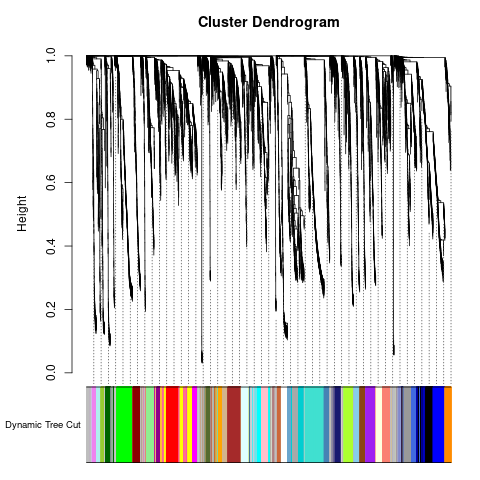

In [ ]:
%%R
plotDendroAndColors(
  geneTree,
  moduleColors,
  c("Dynamic Tree Cut"),
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05
)

## Plotting the resulting network

In [ ]:
%%R
restGenes <- (moduleColors != "grey")
diss1 <- 1-TOMsimilarityFromExpr( datExpr[, restGenes], power = softPower )
hier1 <- hclust(as.dist(diss1), method="average" )
diag(diss1) = NA

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


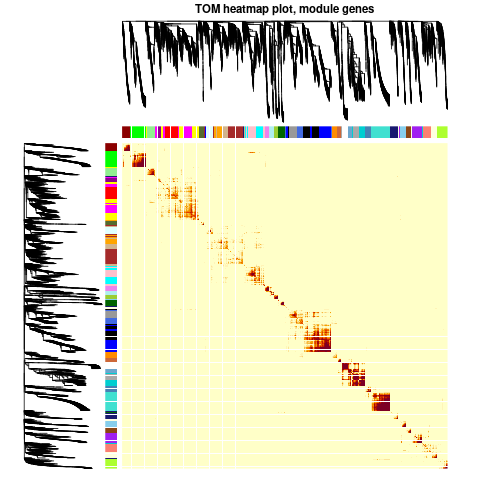

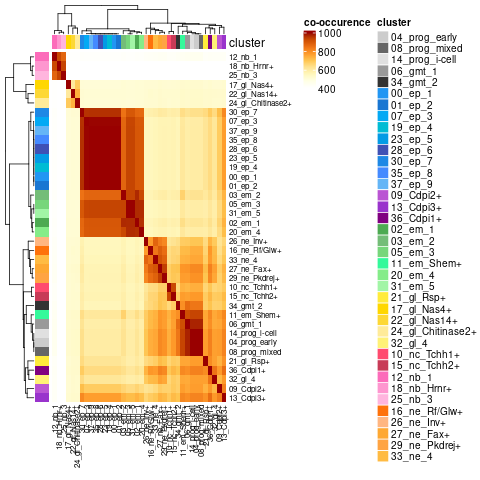

In [ ]:
%%R
#png(
#  file = "./20230802_hysim_wgcna_NetworkTOMplot.png",
#  width = 1280,
#  height = 1280,
#  units = "px",
#  res = 400
#)
TOMplot(1-diss1^4, hier1, as.character(moduleColors[restGenes]), # 1-X to change color
        main = "TOM heatmap plot, module genes" )
#dev.off()

#pdf(
#  paste0(
#   "./",
#    fcha(),
#    "_hysim_cpm_coocurrence.pdf"
#  ),
#  he = 10,
#  wi = 14
#)
draw(cooc_hmap)
#dev.off()

## Eigengenes

An eigengene of a given module can be understood as: “The first principal component of a given module. It can be considereded a representative of the expression profiles of the genes in that given module.”

In [ ]:
%%R
# Calculate eigengenes
MEList <- moduleEigengenes(datExpr, colors = moduleColors)
MEs <- MEList$eigengenes

# Cluster module eigengenes
METree <- hclust(
  as.dist(1 - cor(MEs)), # Calculate dissimilarity of module eigengenes
  method = "average"
  )

In [ ]:
%%R
hysim_eigengenes <- data.frame(t(MEs))
rownames(hysim_eigengenes) <- sub("ME", "", rownames(hysim_eigengenes))

head(hysim_eigengenes[,1:5])

          X04_prog_early X08_prog_mixed X14_prog_i.cell   X06_gmt_1   X34_gmt_2
black        0.045941550     0.08209751      0.05736622  0.53785295  0.78208486
blue        -0.004280004     0.00749668      0.00105422  0.12532380  0.96678029
brown       -0.095834088    -0.09315172     -0.04100778 -0.10187813 -0.09903002
cyan        -0.118687230    -0.11011825     -0.12214499 -0.11115571 -0.06101777
darkgreen   -0.067188509    -0.05957804     -0.07224553 -0.05922377 -0.05286922
darkgrey    -0.035716689    -0.03296509     -0.03714529 -0.03704538 -0.03841339


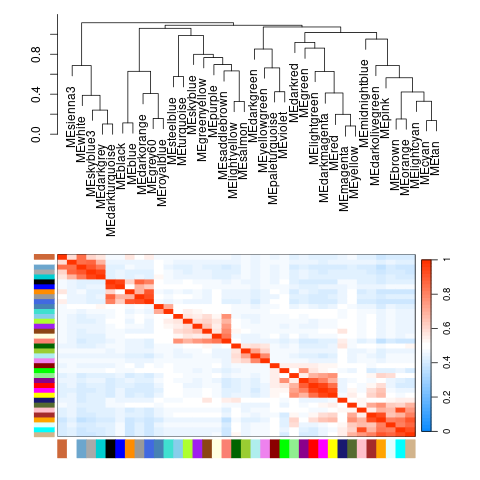

In [ ]:
%%R
plotEigengeneNetworks(
  orderMEs(MEs),
  "",
  marDendro = c(0, 4, 1, 2),
  marHeatmap = c(3, 4, 1, 2),
  cex.lab = 0.8,
  xLabelsAngle = 90
)

## Module membership and connectivity

In [ ]:
%%R
#Source folder needs to be changed since it uses functions in other folders
source("/mnt/sda/alberto/projects/pristina/pristina_transcriptomic_landscape/code/R_functions/wgcna_igraph_functions/wgcna_igraph_functions.R")
sourceFolder(
  "/mnt/sda/alberto/projects/dev/comparABle/code/functions/", #change for definitive path once its final
  recursive = TRUE
  )

R[write to console]: 9 files sourced from folder "/mnt/sda/alberto/projects/dev/comparABle/code/functions/"



In [ ]:
%%R
datKME <- signedKME(datExpr, MEs, outputColumnName = "MM_")

In [ ]:
%%R
hysim_id_module_kME <-
  id_module_kME(#need to find where is this function from!
    modulecolors = moduleColors,
    datkme = datKME
  )

filt_kME <- hysim_id_module_kME$kME > 0.9

hysim_top_connected <-
  hysim_id_module_kME[filt_kME,1:2] #two first columns

# This below works because adjacency, TOM and dissTOM are in the same order
# dissTOM_top_connected <-
#   dissTOM[
#     rownames(adjacency) %in% plei_top_connected$id,
#     colnames(adjacency) %in% plei_top_connected$id
#     ]

In [ ]:
%%R
head(hysim_id_module_kME)

                       id      module       kME
LOC130612032 LOC130612032   royalblue 0.9628957
LOC130612033 LOC130612033       black 0.9599057
LOC130612037 LOC130612037     skyblue 0.6670691
LOC130612038 LOC130612038 greenyellow 0.6914311
LOC130612040 LOC130612040       white 0.9942066
LOC130612042 LOC130612042   steelblue 0.9874500


In [ ]:
%%R
head(hysim_cpm)

             04_prog_early 08_prog_mixed 14_prog_i-cell    06_gmt_1  34_gmt_2
LOC130612032     85.085718     60.067877      93.479559  130.253801  72.88523
LOC130612033      2.354150     11.441500       3.510969   49.884434  58.30819
LOC130612034     11.770751     11.441500      14.482749   13.856787   0.00000
LOC130612035     14.124902     17.162250      10.532908    6.466501  14.57705
LOC130612036    507.151236    946.784152     359.874360 1824.476999 903.77691
LOC130612037      5.717222      2.860375       8.338552    5.542715  14.57705
                00_ep_1    01_ep_2   07_ep_3   19_ep_4    23_ep_5    28_ep_6
LOC130612032   7.048842   4.623649  2.339473  0.000000   5.307574   5.349453
LOC130612033   4.485627   3.200988  1.559649  4.709861   0.000000   0.000000
LOC130612034   5.126431   7.113306  7.798244  4.709861   2.653787   0.000000
LOC130612035  25.632153  24.540907 56.147356 30.614095  23.884083  16.048359
LOC130612036 144.180860 120.214879 96.698224 44.743678 214.956743 171

## Visualizing the top eigengenes per module

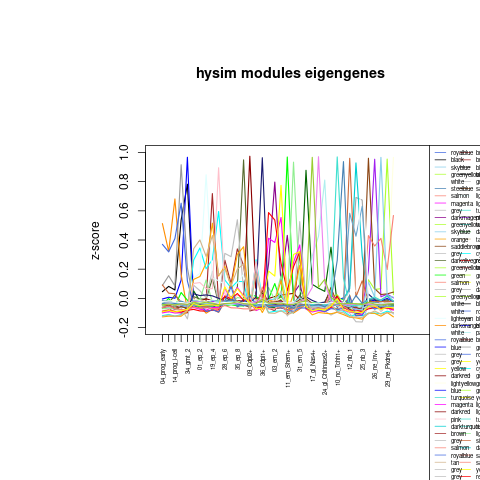

In [ ]:
%%R
num_columns <- 2

legend_width <- par("usr")[2] - par("usr")[1]  # Width of the plot area

item_width <- legend_width / num_columns

par(
  mar=c(10,10,10,3)+0.1, xpd = TRUE
)
plot(
  1,
  type = "n",
  xlab = "",
  ylab = "z-score",
  ylim = c(-0.2, 1),
  xlim = c(0, 43),
  main = "hysim modules eigengenes",
  xaxt = "n"
)
axis(
  side=1,
  at = 1:38,
  labels = colnames(hysim_cpm),
  las = 2,
  cex.axis = 0.5,
  xlab="cell type clusters"
)
for (i in 1:nrow(hysim_eigengenes)) {
  col_i <- hysim_id_module_kME$module[
    hysim_id_module_kME$module == rownames(hysim_eigengenes)[i]
    ]
  lines(c(1:38),
        hysim_eigengenes[i, 1:38],
        type = "l",
        col = col_i,
        lwd=1.5)
}
legend(
  x = "topright",
  legend = hysim_id_module_kME$module,
  inset = c(-0.16,0),
  lty = 1,
  col = hysim_id_module_kME$module,
  ncol = num_columns,
  cex = 0.5,
  text.width = item_width
)

In [ ]:
%%R
hysim_wg_viz <- merge(
  t(datExpr),
  hysim_id_module_kME,
  by.x = 0,
  by.y = 1,
  all.y = T # do we need this here?
  ) %>%
  column_to_rownames("Row.names") %>%
  arrange(module)

In [ ]:
%%R
head(hysim_id_module_kME)

                       id      module       kME
LOC130612032 LOC130612032   royalblue 0.9628957
LOC130612033 LOC130612033       black 0.9599057
LOC130612037 LOC130612037     skyblue 0.6670691
LOC130612038 LOC130612038 greenyellow 0.6914311
LOC130612040 LOC130612040       white 0.9942066
LOC130612042 LOC130612042   steelblue 0.9874500


In [ ]:
%%R
(hysim_ctypes_col)

             cluster     col
1      04_prog_early #CCCCCC
2      08_prog_mixed #666666
3     14_prog_i-cell #E0E0E0
4           06_gmt_1 #999999
5           34_gmt_2 #333333
6            00_ep_1 #2196F3
7            01_ep_2 #1976D2
8            07_ep_3 #03A9F4
9            19_ep_4 #00BCD4
10           23_ep_5 #039BE5
11           28_ep_6 #3F51B5
12           30_ep_7 #1E88E5
13           35_ep_8 #448AFF
14           37_ep_9 #64B5F6
15         09_Cdpi2+ #BA55D3
16         13_Cdpi3+ #9933CC
17         36_Cdpi1+ #800080
18           02_em_1 #4DAA52
19           03_em_2 #74BD78
20           05_em_3 #77D67B
21       11_em_Shem+ #34F99B
22           20_em_4 #85EC89
23           31_em_5 #A2F5A6
24        21_gl_Rsp+ #FFEB3B
25       17_gl_Nas4+ #FFD700
26      22_gl_Nas14+ #FDD835
27 24_gl_Chitinase2+ #FFEB99
28           32_gl_4 #FFF176
29      10_nc_Tchh1+ #FF4B6E
30      15_nc_Tchh2+ #C83B57
31           12_nb_1 #FC6CBA
32       18_nb_Hrnr+ #FE96CF
33           25_nb_3 #FFB5DE
34     16_ne_R

In [ ]:
%%R
#Default row spliting
module_split <- paste0(hysim_wg_viz$module)
print(unique(module_split))

 [1] "black"          "blue"           "brown"          "cyan"          
 [5] "darkgreen"      "darkgrey"       "darkmagenta"    "darkolivegreen"
 [9] "darkorange"     "darkred"        "darkturquoise"  "green"         
[13] "greenyellow"    "grey"           "grey60"         "lightcyan"     
[17] "lightgreen"     "lightyellow"    "magenta"        "midnightblue"  
[21] "orange"         "paleturquoise"  "pink"           "purple"        
[25] "red"            "royalblue"      "saddlebrown"    "salmon"        
[29] "sienna3"        "skyblue"        "skyblue3"       "steelblue"     
[33] "tan"            "turquoise"      "violet"         "white"         
[37] "yellow"         "yellowgreen"   


R[write to console]: `use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

R[write to console]: 'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



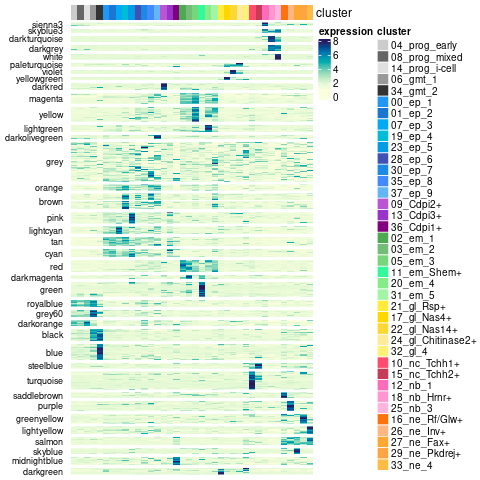

In [ ]:
%%R

hysim_ha_clu <- hysim_ctypes_col$col
names(hysim_ha_clu) <- hysim_ctypes_col$cluster

clu_ha = HeatmapAnnotation(
  name = "cell types",
  cluster = hysim_ctypes_col$cluster,
  col = list( cluster = hysim_ha_clu )
  )


set.seed(4343)
Heatmap(
  hysim_wg_viz[,1:38]+2,
  name = "expression",
  cluster_rows= T,
  cluster_columns=F,
  show_row_names = F,
  show_row_dend = F,
  cluster_row_slices =T,#
  show_column_names = F,
  row_split = module_split,
  row_title_gp = gpar(fontsize = 9),
  row_title_rot = 0,
  border=F,
  col = rev(sequential_hcl(10,"YlGnBu")),
  # right_annotation = ha,
  top_annotation=clu_ha,
  heatmap_legend_param = gpar(nrow = 2)
)

Load the list of curated transcription factor annotations for hydractinia and the cpm table

In [ ]:
%%R
#Load the list of curated annotations for hydractinia and the counts
hysim_tfs <- read.table('/mnt/sda/david/interpro_diamond_blast/hydractinia_only/20230725_hydractinia_TFs_curated.tsv',
                       header=T)[,1:2]
head(hysim_tfs)

            id       class
1 LOC130612065 Homeodomain
2 LOC130612084         ETS
3 LOC130612125         MYB
4 LOC130612189     zf_C2H2
5 LOC130612234         MYB
6 LOC130612244     zf_C2H2


In [ ]:
%%R
hysim_tfs_cpm <-
  hysim_cpm[
    rownames(hysim_cpm) %in% hysim_tfs$id,
    1:38
    ]

In [ ]:
%%R
# Fisher test TFs in modules / TFs in the whole genome
nrow(hysim_id_module_wgcna[hysim_id_module_wgcna$id %in% rownames(hysim_tfs_cpm),])

[1] 69


In [ ]:
%%R
library(compare)
comparison <- compare(hysim_tfs_cpm,hysim_tfs_cpm_topclass,allowAll=T)
comparison$tM

    04_prog_early 08_prog_mixed 14_prog_i-cell     06_gmt_1   34_gmt_2
1       0.0000000      1.430188      0.4388712    1.8475716    0.00000
2       0.3363072      0.000000      0.0000000    0.9237858    0.00000
3       0.3363072      0.000000      0.0000000    0.9237858    0.00000
4       0.3363072      1.430188      1.3166135    0.9237858    0.00000
5       0.6726144      0.000000      0.4388712    0.0000000    0.00000
6       1.0089216      0.000000      2.6332270    2.7713575    0.00000
7       1.3452287      1.430188      0.4388712    0.0000000    0.00000
8       1.3452287      1.430188      0.4388712    3.6951433   29.15409
9       1.3452287      1.430188      0.8777423    2.7713575   14.57705
10      1.3452287      2.860375      3.5109694    0.9237858    0.00000
11      1.6815359      4.290563      0.8777423    4.6189291    0.00000
12      2.0178431      5.720750      0.8777423    0.9237858    0.00000
13      2.0178431      8.581125      1.3166135    0.9237858   14.57705
14    

66   32.6809950   31.654214   34.3122729    9.419722  29.191656  32.096718
67   43.5746601   71.488730   57.7070044   68.292982  98.190117  37.446171
68   41.6522486   39.834516   35.8719216   47.098608  31.845443  16.048359
69   12.8160765   12.092621    6.2385951    4.709861  18.576509   5.349453
70   66.6435977   71.133064   49.1289362   56.518330  50.421952  32.096718
71  118.5487075  140.843467  116.1938331  131.876102  95.536330  85.591248
72   28.8361721   24.540907   95.9183992   25.904234  76.959822  37.446171
73    1.2816076    1.066996    0.7798244    0.000000   0.000000   0.000000
74   27.5545644   26.674899   27.2938534   28.259165  21.230296  48.145077
75   55.1091289   42.679839   48.3491118   35.323956  58.383313  37.446171
76   48.7010906   46.592157   47.5692874   58.873260  37.153017  21.397812
77   57.0315404   64.731089   60.0464775   63.583121  26.537870  48.145077
78   30.1177797   36.989193   17.1561364   42.388747  23.884083  37.446171
79    5.1264306    6.7576

124  287.931818  479.41773  489.23081    78.3685168  171.987811  125.79605
125   70.383333   65.37514   36.69231    45.7149681   46.258791  110.07155
126  127.969697  130.75029  232.38463   227.6418820  309.578061  267.31661
127   63.984848   32.68757  146.76924    27.0557975   33.211439  110.07155
128  159.962121  207.02129  269.07694   115.6868581  171.987811  141.52056
129  351.916666  403.14672  354.69233   197.7872090  227.735585  220.14309
130  153.563636  272.39643  171.23078   171.6643700  122.170652  172.96957
131

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     27.409526   43.67718
55    34.854621    0.000000     27.409526   32.75789
56    27.883697   30.951320     45.682543   10.91930
57     6.970924   43.331848      9.136509    0.00000
58    27.883697   18.570792     36.546034   76.43507
59    62.738318   43.331848     82.228577   10.91930
60    62.738318   61.902640     45.682543   65.51577
61    34.854621   30.951320     18.273017   54.59648
62    62.738318   43.331848    146.184137   98.27366
63    27.883697   18.570792     27.409526   54.59648
64    13.941849    0.000000     27.409526   10.91930
65    13.941849   37.141584     45.682543   21.83859
66    34.854621   61.902640     36.546034   43.67718
67    90.622016   30.951320      0.000000   21.83859
68    83.651091   74.283167     18.273017   32.75789
69    34.854621   18.570792     18.273017    0.00000
70    48.796470   68.092903      9.136509   98.27366
71   132.447561   80.473431     82.228577   76.43507
72   104.563864   68.092903     91.365086   32.75789
73     6.970924    0

In [ ]:
%%R
nrow(hysim_tfs_cpm)

[1] 194


In [ ]:
%%R
nrow(hysim_tfs_cpm_topclass)

[1] 159


## Connectivity of transcription factor classes and modules eigengenes

In [ ]:
%%R
##sorting main classes alfabetically
hysim_tfs_mainclasses <-
  names(
    table(hysim_tfs$class)[
      table(hysim_tfs$class) >= 3
      ]
    )
hysim_tfs_mainclasses <- sort(hysim_tfs_mainclasses) # sort alphabetically
hysim_tfs_mainclasses

 [1] "ARID"        "bHLH"        "CSD"         "E2F"         "ETS"        
 [6] "Forkhead"    "HMG"         "Homeodomain" "MBD"         "MH1"        
[11] "MYB"         "NF_Y"        "RFX"         "T_box"       "TF_bZIP"    
[16] "TFII"        "THAP"        "zf_C2H2"     "zf_GATA"    


In [ ]:
%%R
hysim_tfs_cpm_topclass <-
  merge(
    hysim_tfs_cpm,
    hysim_tfs,
    by.x = 0,
    by.y = 1,
  ) %>%
  column_to_rownames("Row.names") %>%
  filter(class %in% hysim_tfs_mainclasses)

head(hysim_tfs_cpm_topclass)

             04_prog_early 08_prog_mixed 14_prog_i-cell   06_gmt_1  34_gmt_2
LOC130612065       8.40768      8.581125       6.583068   8.314072  14.57705
LOC130612084      22.53258     22.883001       8.777423  19.399502  14.57705
LOC130612125     272.74513    207.377193     308.087562 202.309095 189.50161
LOC130612189      24.55042     31.464126      11.410650   2.771357  14.57705
LOC130612234      80.71372    101.543315      75.046970  56.350935  14.57705
LOC130612244      33.96703     27.173563      53.981154  34.180075  43.73114
                00_ep_1    01_ep_2   07_ep_3    19_ep_4   23_ep_5    28_ep_6
LOC130612065   6.408038   4.623649  4.678946  11.774652  10.61515   5.349453
LOC130612084  21.787330  13.870948  9.357893   4.709861  34.49923   5.349453
LOC130612125 184.551501 173.564677 69.404370 146.005685 116.76663 149.784685
LOC130612189   7.048842   2.845323  3.119298   7.064791  13.26893  10.698906
LOC130612234  32.040191  32.009879 32.752624  65.938051  10.61515  74.892342

In [ ]:
%%R
head(hysim_id_module_wgcna)

                       id      module
LOC130612032 LOC130612032   royalblue
LOC130612033 LOC130612033       black
LOC130612037 LOC130612037     skyblue
LOC130612038 LOC130612038 greenyellow
LOC130612040 LOC130612040       white
LOC130612042 LOC130612042   steelblue


In [ ]:
%%R

write.table(
  hysim_id_module_wgcna,
  file = paste0(
    "./",
    fcha(),
    "_hysim_wgcna_id_module.tsv"
    ),
    quote=F,
    sep='\t',
    col.names = NA
)

## Expression of transcription factor classes on module eigengenes

In [ ]:
%%R
#this part has to be revisited once the colors of the modules are chosen
hysim_modules <- unique(hysim_id_module_wgcna$module)
hysim_modules_colors <- unique(hysim_id_module_wgcna$module)

In [ ]:
%%R
hysim_tfs_modules_cor <- datKME[
  rownames(datKME) %in% rownames(hysim_tfs_cpm_topclass),
]

colnames(hysim_tfs_modules_cor) <- hysim_modules

We count the number of TFs of each class that show high connectivity to each module and will use this as a proxy to infer what TF classes are potentially regulating each gene module.

In [ ]:
%%R
hysim_tfs_modules <-
  matrix(
    0,
    nrow = length(hysim_tfs_mainclasses),
    ncol = length(hysim_modules)
    )

rownames(hysim_tfs_modules) <-
  hysim_tfs_mainclasses

colnames(hysim_tfs_modules) <-
  hysim_modules

hysim_tfs_modules_pct <- hysim_tfs_modules

In [ ]:
%%R
head(hysim_tfs_modules)

         royalblue black skyblue greenyellow white steelblue salmon magenta
ARID             0     0       0           0     0         0      0       0
bHLH             0     0       0           0     0         0      0       0
CSD              0     0       0           0     0         0      0       0
E2F              0     0       0           0     0         0      0       0
ETS              0     0       0           0     0         0      0       0
Forkhead         0     0       0           0     0         0      0       0
         grey darkmagenta orange saddlebrown darkolivegreen green lightcyan
ARID        0           0      0           0              0     0         0
bHLH        0           0      0           0              0     0         0
CSD         0           0      0           0              0     0         0
E2F         0           0      0           0              0     0         0
ETS         0           0      0           0              0     0         0
Forkhead    

In [ ]:
%%R
length( match(
      hysim_id_module_wgcna$module,
      sub( "MM_","",colnames(datKME) )
      ))

[1] 7547


In [ ]:
%%R
dim(hysim_tfs_modules_cor)

[1] 59 38


And matrices get filled:

In [ ]:
%%R
for (i in hysim_modules) {
  h <- which(hysim_modules == i)
  for (j in hysim_tfs_mainclasses) {
    n <- which(hysim_tfs_mainclasses == j)
    all_tfs_class_j <- hysim_tfs$id[hysim_tfs$class == j]

    cors_jclass_in_imodule <-
      hysim_tfs_modules_cor[
        rownames(hysim_tfs_modules_cor) %in% all_tfs_class_j,
        colnames(hysim_tfs_modules_cor) == i
        ]

    good_tfs_jclass_in_imodule <-
      length(
        cors_jclass_in_imodule[cors_jclass_in_imodule > 0.01] # play around with this: % of TFs in that class with cor > 0.5,0.6, ...
        )

    hysim_tfs_modules[n, h] <-
      good_tfs_jclass_in_imodule

    hysim_tfs_modules_pct[n, h] <-
      good_tfs_jclass_in_imodule / length(cors_jclass_in_imodule) #maybe the way to do this is by dividing by the total number of TFs expressed in that module... except this is not a cell type or a physical location...
  }
}

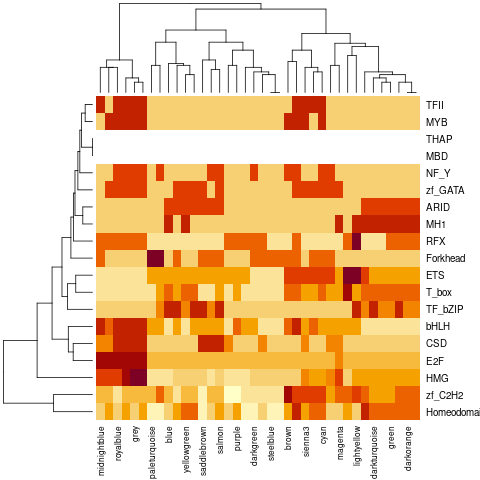

In [ ]:
%%R
heatmap(na.omit(hysim_tfs_modules))

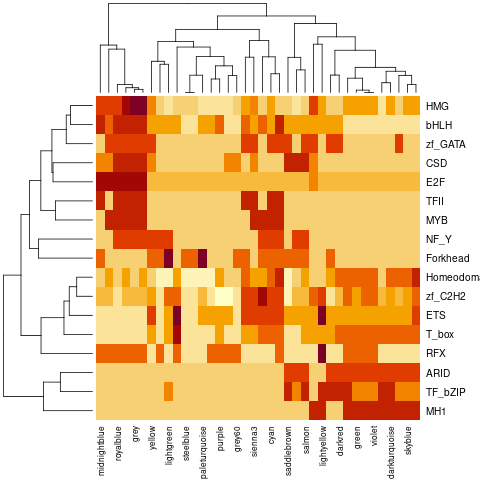

In [ ]:
%%R
heatmap(na.omit(hysim_tfs_modules_pct))

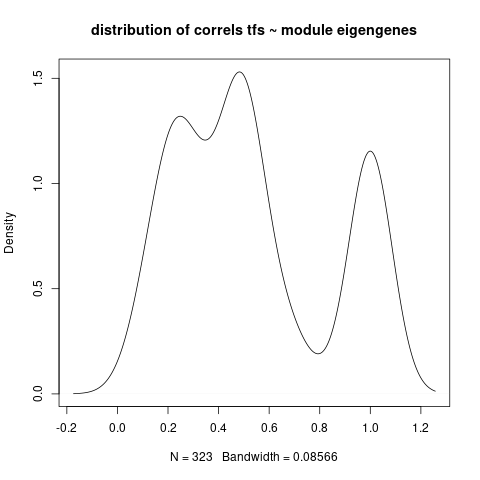

In [ ]:
%%R
plot(
  density(
    na.omit(hysim_tfs_modules_pct)[
      na.omit(hysim_tfs_modules_pct) > 0
      ]
    ),
  main = "distribution of correls tfs ~ module eigengenes"
  )

In [ ]:
%%R
tf_wg_pct_hm <- t(
  apply(
    (hysim_tfs_modules_pct),
    1,
    function(x) x  / max(x)
    )
  )

tf_wg_pct_hm <-
  tf_wg_pct_hm[
    apply(tf_wg_pct_hm, 1, function(x){any(!is.nan(x))}),
    ]

col_heat_cor_tfs <-
  colorRamp2(
    seq(0,0.8,len=10),
    colorRampPalette(rev(
      c(
        "#ffee61",
        "#96e88e",
        "#5dc9ac",
        "#4da2ba",
        "#6b6eab",
        "#552761"
        ))
      )(10)
    )

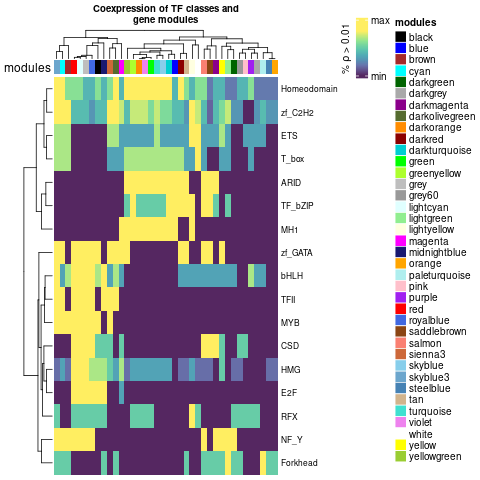

In [ ]:
%%R
modules_ha_colors <- unique(hysim_modules_colors)
names(modules_ha_colors) <- unique(hysim_modules)

modules_ha <-
  HeatmapAnnotation(
    modules = colnames(hysim_tfs_modules) ,
    col = list(modules=modules_ha_colors),
    annotation_name_side='left'
    )

Heatmap(
  name = "log(# cor(Sp) > 0.01)",
  (tf_wg_pct_hm),
  # plei_tfs_modules_pct, #another option is inflate the colors for the maximum pct per row.
  col = col_heat_cor_tfs,
  heatmap_legend_param = list(
    title=expression(paste("% ", rho, " > 0.01")),
    title_position = "leftcenter-rot",
    at=c(0,1),
    labels=c("min","max")
  ),
  row_names_side = "right",
  row_names_gp = gpar(cex=0.7),
  clustering_method_rows = "ward.D2",
  cluster_columns = T,
  show_column_names = F,
  column_title="Coexpression of TF classes and\ngene modules",
  column_title_gp = gpar(cex=0.8,fontface="bold"),
  top_annotation=modules_ha # WGCNA modules
)

In [ ]:
%%R

coexp_tf_mod<- Heatmap(
  name = "log(# cor(Sp) > 0.01)",
  tf_wg_pct_hm,
  col = col_heat_cor_tfs,
  heatmap_legend_param = list(
    title=expression(paste("% ", rho, " > 0.01")),
    title_position = "leftcenter-rot",
    at=c(0,1),
    labels=c("min","max")
  ),
  row_names_side = "right",
  row_names_gp = gpar(cex=0.7),
  clustering_method_rows = "ward.D2",
  cluster_columns = T,
  show_column_names = F,
  column_title="Coexpression of TF classes and\ngene modules",
  column_title_gp = gpar(cex=0.8,fontface="bold"),
  top_annotation=modules_ha # WGCNA modules
)

pdf(
  paste0(
   "./",
   fcha(),
    "_hysim_coexp_tf_mod.pdf"
  ),
  he = 10,
  wi = 14
)
draw(coexp_tf_mod)
dev.off()

png 
  2 


In [ ]:
%%R
length(hysim_modules)

[1] 38


## Extra steps to make the protein ID from eggnog matches the gene ID used for scanpy

In [ ]:
gene_all = pd.read_csv('/mnt/sda/david/interpro_diamond_blast/hydractinia_only/recip_blasts/20230801_equivalence_gene_protein_diamond_ncbi_GOs_COGs.tsv', sep='\t')

In [ ]:
gene_all.pop('accesion_code')
gene_all.pop('coverage')
gene_all.pop('eval')
gene_all.pop('match')
gene_all.pop('ncbi_name')
gene_all.pop('Clusters_of_Orthologous_Genes(Functional_Categories)')
gene_all.pop('protein_id')

0         XP_057300348.1
1         XP_057292351.1
2         XP_057289301.1
3         XP_057289301.1
4         XP_057289301.1
               ...      
559870    XP_057317796.1
559871    XP_057317796.1
559872    XP_057317796.1
559873    XP_057317796.1
559874    XP_057317796.1
Name: protein_id, Length: 559875, dtype: object

In [ ]:
gene_all = gene_all.dropna(how='any')

In [ ]:
gene_all

,gene_id,Gene_Ontology_Terms
2,LOC130612032,-
3,LOC130612032,-
4,LOC130612032,-
5,LOC130612032,-
6,LOC130612032,-
...,...,...
559870,LOC130662872,-
559871,LOC130662872,-
559872,LOC130662872,-
559873,LOC130662872,-


In [ ]:
gene_all.to_csv('/mnt/sda/david/interpro_diamond_blast/hydractinia_only/recip_blasts/hsym_GOs_mod.tsv',index=False, sep="\t")

We can finally write this set of genes and modules to store as a supplementary file

## Gene Ontology Analysis

In [ ]:
%%R
source("/mnt/sda/david/python_scripts/topGO_wrap_function_updated.R")

In [ ]:
%%R
#gene universe
gene_universe <- rownames(hysim_cpm)

# gene-GO mappings
hysim_id_GO <-
  readMappings(
    "/mnt/sda/david/interpro_diamond_blast/hydractinia_only/recip_blasts/hsym_GOs_mod.tsv"
  )

#list of genes of interest
hysim_wg_list <- split(rownames(hysim_id_module_kME),hysim_id_module_kME$module)

In [ ]:
%%R
#head(hysim_id_GO)
head(hysim_wg_list)

$black
  [1] "LOC130612033" "LOC130612241" "LOC130612379" "LOC130612380" "LOC130612390"
  [6] "LOC130612451" "LOC130612480" "LOC130612581" "LOC130612770" "LOC130613298"
 [11] "LOC130613764" "LOC130613917" "LOC130613950" "LOC130614067" "LOC130614352"
 [16] "LOC130614357" "LOC130614389" "LOC130614392" "LOC130614474" "LOC130614538"
 [21] "LOC130614608" "LOC130614624" "LOC130614671" "LOC130614742" "LOC130614756"
 [26] "LOC130614798" "LOC130614886" "LOC130618199" "LOC130621127" "LOC130621158"
 [31] "LOC130621603" "LOC130621652" "LOC130621695" "LOC130621733" "LOC130621782"
 [36] "LOC130621799" "LOC130621805" "LOC130621826" "LOC130621919" "LOC130622049"
 [41] "LOC130622141" "LOC130622142" "LOC130622227" "LOC130622256" "LOC130622270"
 [46] "LOC130622282" "LOC130622307" "LOC130622356" "LOC130622548" "LOC130622699"
 [51] "LOC130622912" "LOC130623008" "LOC130623620" "LOC130623642" "LOC130623695"
 [56] "LOC130623710" "LOC130623884" "LOC130624098" "LOC130624248" "LOC130624918"
 [61] "LOC130625347" 

 [36] "LOC130623856" "LOC130624039" "LOC130624162" "LOC130624256" "LOC130624258"
 [41] "LOC130625070" "LOC130625389" "LOC130625438" "LOC130625828" "LOC130628622"
 [46] "LOC130628771" "LOC130628878" "LOC130628923" "LOC130628977" "LOC130628986"
 [51] "LOC130629281" "LOC130629415" "LOC130629457" "LOC130629653" "LOC130629684"
 [56] "LOC130630027" "LOC130630174" "LOC130630194" "LOC130630274" "LOC130630460"
 [61] "LOC130630528" "LOC130630560" "LOC130632934" "LOC130634132" "LOC130635542"
 [66] "LOC130635556" "LOC130635623" "LOC130635631" "LOC130635707" "LOC130635951"
 [71] "LOC130636002" "LOC130636231" "LOC130636233" "LOC130636381" "LOC130636536"
 [76] "LOC130636586" "LOC130636597" "LOC130636641" "LOC130636701" "LOC130636877"
 [81] "LOC130638905" "LOC130639268" "LOC130640729" "LOC130640871" "LOC130640910"
 [86] "LOC130641022" "LOC130641054" "LOC130641104" "LOC130641303" "LOC130641381"
 [91] "LOC130641404" "LOC130641535" "LOC130641561" "LOC130641597" "LOC130641811"
 [96] "LOC130641818" "LOC130

In [ ]:
%%R
#The actual GO analysis:
hysim_wg_GO_all <-
  getGOs(
    hysim_wg_list,
    gene_universe= gene_universe,
    gene2GO = hysim_id_GO,
    alg='Classic',
    stat='fisher'
    )

hysim_wg_GO_table <- ldply(hysim_wg_GO_all[[1]], .id="module")

[1] "Starting analysis 1 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2631 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 2 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 3052 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 3 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2395 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 4 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2473 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 5 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1498 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 6 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1498 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 7 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1601 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 8 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1882 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 9 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2388 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 10 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2030 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 11 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1496 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 12 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2707 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 13 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2563 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 14 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 4885 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 15 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2517 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 16 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2946 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 17 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2138 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 18 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2027 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 19 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 3020 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 20 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2723 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 21 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1866 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 22 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1237 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 23 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 3309 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 24 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2381 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 25 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2135 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 26 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2448 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 27 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1455 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 28 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 3048 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 29 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1414 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 30 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2408 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 31 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1148 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 32 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1865 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 33 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 2458 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 34 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 3376 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 35 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 1403 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 36 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 983 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 37 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 3478 nontrivial nodes
		 parameters: 
			 test statistic: fisher



[1] "Starting analysis 38 of 38"


R[write to console]: 
Building most specific GOs .....

R[write to console]: 	( 14225 GO terms found. )

R[write to console]: 
Build GO DAG topology ..........

R[write to console]: 	( 14625 GO terms and 32953 relations. )

R[write to console]: 
Annotating nodes ...............

R[write to console]: 	( 7547 genes annotated to the GO terms. )

R[write to console]: 
			 -- Classic Algorithm -- 

		 the algorithm is scoring 708 nontrivial nodes
		 parameters: 
			 test statistic: fisher



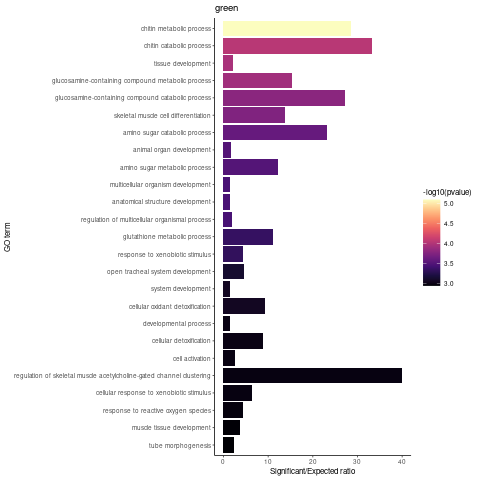

In [ ]:
%%R
#to visually inspect which GO term is enriched and
#highly significant in each respective module
hysim_wg_GO_all$GOplot[[12]]


In [ ]:
%%R
destination = '/mnt/sda/david/hydractinia/wgcna/20230922_hsym_modules_GOterms.pdf'

pdf(file=destination)

for (i in hysim_wg_GO_all$GOplot){
  par(mfrow =c(6,7))
  plot(i)
}
#pdf(
#  paste0(
#   "./",
#    fcha(),
#    "_hysim_modules_GO_terms.pdf"
#  ),
#  he = 10,
#  wi = 14
#)

dev.off()

png 
  2 


In [ ]:
%%R
write.table(
  hysim_wg_GO_table,
  file = paste0(
    "./",
    fcha(),
    "_hysim_wgcna_GOterms.tsv"
    ),
    quote=F,
    sep='\t',
    col.names = NA
)

## Curating manually the modules and names of the resulting network

For making more visual firendly the upcoming graphs, we modified the names of each module based on which cluster does most of the genes coincide

In [ ]:
%%R
hysim_modules_table <-
  read.delim2(
    "/mnt/sda/david/hydractinia/wgcna/hsym_modules_table_20230821.tsv",
    header = T,
    stringsAsFactors = F,
  )

hysim_id_module_newname <-
  merge(
    x = hysim_id_module_wgcna,
    y = hysim_modules_table[,c(1,3,5)],
    by.x = 2,
    by.y = 1,
    all.x = TRUE
  )[,c(2,3,4)]

head(hysim_modules_table)

  wgcna_module wgcna_color                newname newcolor
1    royalblue   royalblue 01_mixed_progenitors_1  #CCCCCC
2   darkorange  darkorange 02_mixed_progenitors_2  #E0E0E0
3       grey60      grey60 03_mixed_progenitors_3  #666666
4        black       black       04_gametogenesis  #999999
5         blue        blue     05_spermatogenesis  #333333
6          tan         tan  06_broad_epithelial_1  #2196F3
        module_humanfriendly
1 module_mixed_progenitors_1
2 module_mixed_progenitors_2
3 module_mixed_progenitors_3
4       module_gametogenesis
5     module_spermatogenesis
6  module_broad_epithelial_1


In [ ]:
%%R
unique(hysim_modules_table$wgcna_module)

 [1] "royalblue"      "darkorange"     "grey60"         "black"         
 [5] "blue"           "tan"            "cyan"           "orange"        
 [9] "lightcyan"      "brown"          "pink"           "darkolivegreen"
[13] "darkred"        "midnightblue"   "red"            "magenta"       
[17] "darkmagenta"    "yellow"         "green"          "lightgreen"    
[21] "darkgreen"      "yellowgreen"    "violet"         "paleturquoise" 
[25] "turquoise"      "steelblue"      "skyblue3"       "sienna3"       
[29] "darkgrey"       "darkturquoise"  "white"          "salmon"        
[33] "saddlebrown"    "purple"         "skyblue"        "greenyellow"   
[37] "lightyellow"    "grey"          


In [ ]:
%%R
head(hysim_id_module_newname)

            id          newname module_humanfriendly
1 LOC130640763 04_gametogenesis module_gametogenesis
2 LOC130645325 04_gametogenesis module_gametogenesis
3 LOC130655461 04_gametogenesis module_gametogenesis
4 LOC130636360 04_gametogenesis module_gametogenesis
5 LOC130628811 04_gametogenesis module_gametogenesis
6 LOC130655187 04_gametogenesis module_gametogenesis


In [ ]:
%%R
hysim_id_module <- hysim_id_module_newname[,c(1,3)]
colnames(hysim_id_module) <- c("id","module")
hysim_id_module$module <-
  factor(
    hysim_id_module$module,
    levels = hysim_modules_table$module_humanfriendly
    )

head(hysim_id_module)

            id               module
1 LOC130640763 module_gametogenesis
2 LOC130645325 module_gametogenesis
3 LOC130655461 module_gametogenesis
4 LOC130636360 module_gametogenesis
5 LOC130628811 module_gametogenesis
6 LOC130655187 module_gametogenesis


In [ ]:
%%R
TOM_2 <- TOM[
  rownames(TOM) %in% hysim_id_module$id,
  colnames(TOM) %in% hysim_id_module$id
]

In [ ]:
%%R
head(TOM_2)

                   LOC130612032         LOC130612033     LOC130612037
LOC130612032 1.0000000000000000 0.024879128138442317 0.00000006728385
LOC130612033 0.0248791281384423 1.000000000000000000 0.00000057398563
LOC130612037 0.0000000672838509 0.000000573985631406 1.00000000000000
LOC130612038 0.0000000056859592 0.000000016287868740 0.00000001252543
LOC130612040 0.0000000001001892 0.000000000001672645 0.00000001419478
LOC130612042 0.0000000041136577 0.000000039176669419 0.00000001529001
                  LOC130612038         LOC130612040       LOC130612042
LOC130612032 0.000000005685959 0.000000000100189160 0.0000000041136577
LOC130612033 0.000000016287869 0.000000000001672645 0.0000000391766694
LOC130612037 0.000000012525427 0.000000014194783221 0.0000000152900090
LOC130612038 1.000000000000000 0.000000001201244907 0.0000000217101263
LOC130612040 0.000000001201245 1.000000000000000000 0.0000000003355687
LOC130612042 0.000000021710126 0.000000000335568658 1.0000000000000000
             

LOC130612040 0.0000000000830065 0.000000000004270487 0.000000002506456
LOC130612042 0.0000008436412037 0.000000094013160088 0.000000001754177
                    LOC130612300          LOC130612305      LOC130612306
LOC130612032 0.00000000246021973 0.0000000004567443787 0.000000001826820
LOC130612033 0.00000002916507544 0.0000000014953417707 0.000000348180194
LOC130612037 0.00000000061615156 0.0000000226734800681 0.000000095848938
LOC130612038 0.00000000496820200 0.0000002317484890647 0.000000275664980
LOC130612040 0.00000000008340565 0.0000000000004370501 0.000000003164844
LOC130612042 0.00000000913037571 0.0000000031751540209 0.000000044082673
                     LOC130612307        LOC130612310      LOC130612318
LOC130612032 0.000000000321538835 0.00444140014976020 0.000000009932179
LOC130612033 0.000000000300096966 0.29664308582304955 0.000000254083656
LOC130612037 0.000000000109567262 0.00000307625513398 0.000000037392017
LOC130612038 0.000000000058851512 0.00000002206087837 0.000

LOC130612038 0.0000000027324691 0.00001054223551775 0.000000784258484248
LOC130612040 0.0000000002159326 0.00000000008536546 0.000000000008845002
LOC130612042 0.0000000017854943 0.00000008299275181 0.003970639779038784
                   LOC130612599        LOC130612603        LOC130612604
LOC130612032 0.0000000006963624 0.00000000118081990 0.00000000244569927
LOC130612033 0.0000000438601750 0.00000000009834873 0.00000000413606525
LOC130612037 0.0000000285024413 0.00000000093761055 0.00000000078521071
LOC130612038 0.0000000032126449 0.00000000287013760 0.00000002168330672
LOC130612040 0.0032866696283354 0.00004865358496216 0.00000000007169732
LOC130612042 0.0000060292905367 0.00000000057604014 0.00000002325248180
                   LOC130612612        LOC130612614       LOC130612615
LOC130612032 0.0000003105027008 0.00000001192519382 0.0000000006007534
LOC130612033 0.0000000894771927 0.00000002310343404 0.0000000023346516
LOC130612037 0.0000000000775146 0.00000051624379913 0.0000002408

                    LOC130612974     LOC130612975         LOC130612982
LOC130612032 0.00000017287238092 0.00000055555674 0.000000000090299198
LOC130612033 0.00000006495616859 0.00001625425336 0.000000000005384312
LOC130612037 0.00000000285097363 0.00000002526862 0.000000027744947264
LOC130612038 0.00000001081194686 0.00000000101520 0.000000002090786046
LOC130612040 0.00000000001936867 0.00000021671060 0.702642086442159419
LOC130612042 0.00000000217285428 0.00000001307871 0.000000045131673646
                   LOC130612983       LOC130612984        LOC130612988
LOC130612032 0.0000000002921724 0.0000000146139969 0.00000001613190112
LOC130612033 0.0000000162049118 0.0000000020877081 0.00000010347724606
LOC130612037 0.0000038666672805 0.0000000006539921 0.00000000145240381
LOC130612038 0.0000020503652091 0.0000000004717711 0.00000950646070193
LOC130612040 0.0000000016455776 0.0000000000249439 0.00000000007966809
LOC130612042 0.0000000075214663 0.0000000008487793 0.00000003684753806
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.00000000098603590 0.000000023915215
                  LOC130614248       LOC130614251       LOC130614252
LOC130612032 0.000000000142706 0.0000000007735050 0.0000000016291293
LOC130612033 0.000000001449920 0.0000000007204601 0.0000000531676561
LOC130612037 0.000000049655681 0.0000002852979615 0.0000015368237247
LOC130612038 0.000000003754537 0.0000030399519164 0.0000010209755970
LOC130612040 0.061450159989488 0.0000000029287555 0.0000000001278693
LOC130612042 0.000000626847359 0.0000001104557931 0.0000000049568941
                     LOC130614253       LOC130614254      LOC130614255
LOC130612032 0.000000000580957881 0.0000003320575082 0.000000306881838
LOC130612033 0.000000037143289619 0.0000001809776546 0.000000277037635
LOC130612037 0.000000000051832819 0.0000000122080631 0.000000051183377
LOC130612038 0.000000000326720189 0.0000000457364971 0.000000012257581
LOC130612040 0.000000000001370171 0.0000000043881022 0.000000003318613
LOC130612042 0.000000000028518268 0.0000000004590804

LOC130612032 0.0000000002419564938 0.0000000005379567 0.00000000423530814
LOC130612033 0.0000000047996413680 0.0000000029780932 0.00000000134867645
LOC130612037 0.0000000006407027637 0.0000000002151622 0.00000001408788812
LOC130612038 0.0000000000731405199 0.0000000005392888 0.00000001170820378
LOC130612040 0.0000000000004131905 0.0000000015245391 0.00000000001085232
LOC130612042 0.0000000057668457662 0.0000000017403414 0.00000001191212765
                   LOC130614510       LOC130614514       LOC130614517
LOC130612032 0.0000000157874516 0.0000000434490617 0.0000078064011169
LOC130612033 0.0000000085155801 0.0000000107587917 0.0005010670759181
LOC130612037 0.0000000067735454 0.0000000008778919 0.0000000010557039
LOC130612038 0.0000000052210832 0.0000001007944939 0.0000000015424937
LOC130612040 0.0000000014026236 0.0000000010924649 0.0000000000129609
LOC130612042 0.0000000002640153 0.0000000075824059 0.0000000280689111
                   LOC130614520        LOC130614521       LOC13061

LOC130612038 0.00000000094736799 0.00000011431449843 0.0000000018111429
LOC130612040 0.00000000001870326 0.00000000003266928 0.0000000005956795
LOC130612042 0.00000001597308118 0.29056181661730285 0.0005473111547568
                   LOC130614873         LOC130614874       LOC130614875
LOC130612032 0.0000000230087601 0.000000009083162375 0.2838981905123705
LOC130612033 0.0000000971918569 0.000000016691877167 0.0281245675815133
LOC130612037 0.0000000022439385 0.001842373067114047 0.0000001117332475
LOC130612038 0.0000000164990902 0.000000332823231952 0.0000000058439059
LOC130612040 0.0000002522523136 0.000000000007342856 0.0000000002563204
LOC130612042 0.0000000003475181 0.000000009700936620 0.0000000031231168
                     LOC130614878         LOC130614879       LOC130614880
LOC130612032 0.022158566747793599 0.000000006365854040 0.0000000174858635
LOC130612033 0.234123924182447457 0.000000009287729346 0.0000001299756364
LOC130612037 0.000002980958403813 0.000012840353953551 0.0

                     LOC130621100        LOC130621105         LOC130621108
LOC130612032 0.000000000252464164 0.00000002889028132 0.000000000661349586
LOC130612033 0.000000004625372301 0.00000002200905652 0.000000000848799709
LOC130612037 0.000000099083253887 0.00000000704624803 0.000000000085083467
LOC130612038 0.000001975526292930 0.00000001494584555 0.000000001224628693
LOC130612040 0.000000000004908544 0.00000000003764343 0.000000000001615688
LOC130612042 0.001441474142859836 0.00000000044953101 0.000000000490740711
                    LOC130621113      LOC130621120         LOC130621124
LOC130612032 0.00000000291579736 0.000000234300276 0.000000001885065612
LOC130612033 0.00000001718462327 0.000000513888290 0.000000005446740446
LOC130612037 0.00000074730517877 0.000000008306857 0.000000005873425361
LOC130612038 0.00000000013963554 0.000000007828994 0.000000008530242847
LOC130612040 0.00000000009562358 0.000000002283356 0.000000000007980986
LOC130612042 0.00000004598832031 0.00000004

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.0000000004505675
LOC130612033 0.0023639262563371 0.00000002345899015735 0.0000000006185599
LOC130612037 0.0000000194123135 0.00000000824587879718 0.0000001136759300
LOC130612038 0.0000000883685695 0.00103106469283946239 0.0000006987265787
LOC130612040 0.0000000002856745 0.00000000000004860135 0.0000000001279800
LOC130612042 0.0000000011998646 0.00000009277775717956 0.0000000015516190
                    LOC130622317           LOC130622320      LOC130622322
LOC130612032 0.00000000158325546 0.00000000107788435290 0.000000028869265
LOC130612033 0.00000000086752507 0.00000001340350414108 0.000000050553868
LOC130612037 0.00000000591756049 0.00000000805962114919 0.000000000844368
LOC130612038 0.00000002185038903 0.00110141720291588910 0.000000005094307
LOC130612040 0.00000000002292916 0.00000000000003352145 0.000000022048152
LOC130612042 0.00000001486721929 0.00000006046980195707 0.000000043930402
                  LOC130622326       LOC130622328         LOC130622329
LOC130612032 0.000000

LOC130612038 0.000000001935426717 0.000000001276140596 0.0000000030484278
LOC130612040 0.000000000005053346 0.852871155103600453 0.0000000004601604
LOC130612042 0.000000000261153782 0.000000000464624729 0.0000000006102251
                   LOC130622603      LOC130622604       LOC130622607
LOC130612032 0.0000000057372795 0.000000030703181 0.0000000015714902
LOC130612033 0.0000000104851869 0.000000022920285 0.0000000217933306
LOC130612037 0.0000000010606078 0.000000001588995 0.0000004781353106
LOC130612038 0.0000000002289204 0.000001134221986 0.0168932837539344
LOC130612040 0.0000000017812861 0.000000002549212 0.0000000006189693
LOC130612042 0.0000000023591796 0.000000001843421 0.0000002337407832
                    LOC130622610       LOC130622614       LOC130622621
LOC130612032 0.00000004895619000 0.0004898439516115 0.0000000349488015
LOC130612033 0.00000000213245865 0.0793911207234581 0.0000000182787416
LOC130612037 0.00000000319521112 0.0000024261321433 0.0000000011664156
LOC13061203

LOC130612033 0.00000000448716434 0.0000000010750178 0.0000000076560548
LOC130612037 0.00000007591094854 0.0000006233015922 0.0000002665309799
LOC130612038 0.00000001485281992 0.0000008950910371 0.0000000261873576
LOC130612040 0.00000000006263667 0.0000000007803751 0.0000000004801631
LOC130612042 0.00000000331873682 0.0000000026020227 0.0000000007471010
                   LOC130622974      LOC130622975      LOC130622979
LOC130612032 0.0000000243508842 0.000000099638689 0.000000108334509
LOC130612033 0.0000000047129262 0.000000009694675 0.000173037097982
LOC130612037 0.0000000016439385 0.000000003128814 0.000000002047813
LOC130612038 0.0000000028437073 0.000000002789551 0.000000094771651
LOC130612040 0.0000000007698912 0.000000000143448 0.000000001372873
LOC130612042 0.0000000076548696 0.000000063657363 0.000000015531516
                  LOC130622982       LOC130622989       LOC130622991
LOC130612032 0.000000003634184 0.0000000056812982 0.0000037312945216
LOC130612033 0.000000005704807 

LOC130612032 0.00000000040056558 0.000000000281409407 0.0000000291174284
LOC130612033 0.00000000080252387 0.000000000317139768 0.0000000281740121
LOC130612037 0.00000107154844640 0.000000253147591655 0.0000000019019789
LOC130612038 0.00002029451992754 0.000041731424077058 0.0000000184674922
LOC130612040 0.00000000005049722 0.000000000008377247 0.0000000002901847
LOC130612042 0.00000002639960344 0.000000046943078099 0.0000000621282264
                   LOC130623508        LOC130623513      LOC130623515
LOC130612032 0.0000000039279224 0.28713004965748956 0.071591101439055
LOC130612033 0.0000000093446782 0.03602097001483211 0.003829327617083
LOC130612037 0.0000000278597428 0.00000007301930315 0.000000003341257
LOC130612038 0.0000000003026639 0.00000000370933902 0.000000020400817
LOC130612040 0.0000000003527415 0.00000000005306675 0.000066576239084
LOC130612042 0.0000029486599996 0.00000000224316767 0.000000002531900
                       LOC130623516        LOC130623517         LOC13062

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




                     LOC130625395      LOC130625396       LOC130625398
LOC130612032 0.000000000053309648 0.000000008877536 0.0000000342850058
LOC130612033 0.000000000823216636 0.000000182436847 0.0000000056907294
LOC130612037 0.000000004684892787 0.000000007159685 0.0000088791338163
LOC130612038 0.000000000923988302 0.000001447696266 0.0000026377257345
LOC130612040 0.000000000002308117 0.000000007388210 0.0000000006638218
LOC130612042 0.000000000844192636 0.000000031184073 0.0000000035635836
                   LOC130625404      LOC130625405      LOC130625407
LOC130612032 0.0000000049856152 0.000000296963088 0.128697567512163
LOC130612033 0.0000002068987210 0.000000006357010 0.000460301720359
LOC130612037 0.0000000088572860 0.000000001563052 0.000000018773686
LOC130612038 0.0000000017814612 0.000029384506746 0.000000038827214
LOC130612040 0.0000000006482366 0.000000007437664 0.000000001181652
LOC130612042 0.0000000005510892 0.000000003639240 0.000000064379467
                  LOC13062

LOC130612038 0.000000008193277 0.000000000232637433 0.0000000037036235
LOC130612040 0.000000003110705 0.000000000001426521 0.0000000005763487
LOC130612042 0.000000038295770 0.000000000078705998 0.0000000069014814
                  LOC130625698       LOC130625701          LOC130625702
LOC130612032 0.000000003463968 0.0000000003200516 0.0000000001419439825
LOC130612033 0.000000013625636 0.0000000319941768 0.0000000001872967211
LOC130612037 0.000000082351741 0.0000130803359075 0.0000000000047208354
LOC130612038 0.000000121315347 0.0000004701621725 0.0000000001606570703
LOC130612040 0.000000002422760 0.0000000003655150 0.0000000000001572439
LOC130612042 0.000000003605894 0.0000001181906107 0.0000000007527533234
                    LOC130625706       LOC130625708        LOC130625712
LOC130612032 0.00000000025659103 0.0000000007491705 0.12397174981447313
LOC130612033 0.00000000015107170 0.0000000009468596 0.06696560742754416
LOC130612037 0.00000000188759566 0.0000002129144328 0.0000000801070

                  LOC130625955        LOC130625958      LOC130625962
LOC130612032 0.000000001273961 0.00062261159159300 0.000000007158802
LOC130612033 0.000000001285632 0.12316132819942585 0.000000068302414
LOC130612037 0.000003613080650 0.00000406913562276 0.000076157942802
LOC130612038 0.000000652826714 0.00000003039059612 0.000000199485120
LOC130612040 0.000000001051760 0.00000000003195043 0.000000000100634
LOC130612042 0.000000012105866 0.00000504782580447 0.000000052177435
                     LOC130625966          LOC130625969        LOC130625971
LOC130612032 0.000000002024632220 0.0000000001461756422 0.00000000062191778
LOC130612033 0.000000000423894596 0.0000000087423576343 0.00000000151317055
LOC130612037 0.000001794914901855 0.0000000004738255223 0.00000022234763397
LOC130612038 0.000000003311140682 0.0000000006152096174 0.00000066582150056
LOC130612040 0.000000000005246215 0.0000000000002916108 0.00000000009394791
LOC130612042 0.000000012348407526 0.0000000001759943991 0.000

LOC130612032 0.0000036588059790 0.0000000026045684 0.0000034941610013
LOC130612033 0.0009877344917807 0.0000000042144343 0.0000010451535411
LOC130612037 0.0000000010209805 0.0000015058394752 0.0000000018766300
LOC130612038 0.0000000080069843 0.0000000141600308 0.0000000020678221
LOC130612040 0.0000000001212303 0.0000000005493246 0.0000000004267297
LOC130612042 0.0000000055736637 0.0000000005545870 0.0000000117707083
                   LOC130628393       LOC130628399      LOC130628441
LOC130612032 0.0000000937023633 0.0000000284558603 0.000000175517510
LOC130612033 0.0000000432659241 0.0000001710321280 0.000000197989414
LOC130612037 0.0000000396442394 0.0000000019991551 0.000000009744463
LOC130612038 0.0000000096573413 0.0000114715862602 0.000000011913902
LOC130612040 0.0000000006183789 0.0000000001475073 0.000000001838619
LOC130612042 0.0000000070147656 0.0000000567007004 0.000000023082091
                   LOC130628478       LOC130628517         LOC130628518
LOC130612032 0.0000000819

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.00000048980849874 0.0000000023329708 0.00000078311196581
LOC130612033 0.00000030728118736 0.0000000036904669 0.00000002596095772
LOC130612037 0.00000001028974788 0.0000230846058250 0.00000005338954247
LOC130612038 0.00000000263840244 0.0000000340444428 0.00000002552578786
LOC130612040 0.00000000001553687 0.0000000004022256 0.00000000007385946
LOC130612042 0.00000000998785329 0.0000000005514838 0.00000000021026047
                    LOC130629406      LOC130629408         LOC130629415
LOC130612032 0.00000004480389207 0.000000007498370 0.000000139901332821
LOC130612033 0.00000001030440743 0.000000002434951 0.000000008250277246
LOC130612037 0.00000098711478264 0.000000105446801 0.000000011680548923
LOC130612038 0.00000000085188527 0.000000001283500 0.000000002039660925
LOC130612040 0.00000000005644714 0.000000007802194 0.000000000002782594
LOC130612042 0.00000000050687382 0.000000000379614 0.000000002956513659
                    LOC130629416      LOC130629418       LOC130629419
LOC130

LOC130612033 0.0000000096814320 0.0000000005394113 0.0000000109175337
LOC130612037 0.0000001924944283 0.0000001089339018 0.0009850985340699
LOC130612038 0.0000000041246241 0.0000000019904359 0.0000035786038834
LOC130612040 0.0000000002997238 0.0000000002134194 0.0000000004948803
LOC130612042 0.0000000015322583 0.0000000002779657 0.0000000280316623
                   LOC130629678         LOC130629679        LOC130629680
LOC130612032 0.0007059133626075 0.000000000359332389 0.00000000370383744
LOC130612033 0.0000297438238014 0.000000001681358506 0.00000000148475324
LOC130612037 0.0000000083673748 0.000000006188896232 0.00000008734070707
LOC130612038 0.0000000007872012 0.000000017194469934 0.00001447987266250
LOC130612040 0.0000000020715299 0.000000000001272624 0.00000000001326146
LOC130612042 0.0000000019457886 0.000000006718265613 0.00000000018063679
                   LOC130629681       LOC130629684        LOC130629686
LOC130612032 0.0000000027520521 0.0000000496970350 0.009328958465655

LOC130612037 0.0000000666299911 0.00000013966255421 0.0000000020162844
LOC130612038 0.0000000059516701 0.00005110892050293 0.0000115867694597
LOC130612040 0.0000000001061713 0.00000000006459722 0.0000000004058861
LOC130612042 0.0000000127093722 0.00000000214200704 0.0000000748184252
                   LOC130630014       LOC130630016       LOC130630017
LOC130612032 0.0000000282082489 0.0000000289514154 0.0000000261949265
LOC130612033 0.0000001678873789 0.0000001691283017 0.0000001570728542
LOC130612037 0.0000000020226588 0.0000000020946963 0.0000000019459554
LOC130612038 0.0000120246560477 0.0000119287163393 0.0000110113221297
LOC130612040 0.0000000003226412 0.0000000002195464 0.0000000001205225
LOC130612042 0.0000000675099577 0.0000000846047977 0.0000000541191163
                    LOC130630018         LOC130630027       LOC130630030
LOC130612032 0.00000002274421085 0.000000002462283112 0.0000000150418753
LOC130612033 0.00000013467611326 0.000000002061847279 0.0000000666017797
LOC1306

LOC130612033 0.000000000663882652 0.0000149554241980 0.000000988138644
LOC130612037 0.000000003055323801 0.0000376766421290 0.000000019549416
LOC130612038 0.000000023510040374 0.0000000083457243 0.000000001158229
LOC130612040 0.000000000002409773 0.0000000002518554 0.000055142956126
LOC130612042 0.000000015744807509 0.0000000065985496 0.118150094576275
                   LOC130630398        LOC130630405       LOC130630410
LOC130612032 0.0000000017531680 0.00291433462177500 0.0000000023144786
LOC130612033 0.0000000023377688 0.09449194960151402 0.0000000174908746
LOC130612037 0.0000007565352149 0.00000022462102582 0.0000004605168842
LOC130612038 0.0000016483086666 0.00016447240558090 0.0000009057097006
LOC130612040 0.0000000008111708 0.00000000006576373 0.0000000004183374
LOC130612042 0.0000000125113661 0.00000029559160464 0.0000000047902058
                   LOC130630412         LOC130630413        LOC130630416
LOC130612032 0.0000001272317722 0.000000000856955737 0.00000000545129787
LO

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




LOC130612033 0.1636827268446620 0.00000000113572856 0.000001184931279
LOC130612037 0.0000034141282508 0.00000000004202225 0.000000008895277
LOC130612038 0.0000007526509782 0.00000000122134201 0.000000004778265
LOC130612040 0.0000000000296635 0.00000000000679473 0.000000016402893
LOC130612042 0.0000004329348770 0.00000000001462992 0.000000044418757
                     LOC130635841       LOC130635843        LOC130635844
LOC130612032 0.000000000125366284 0.0000000538756560 0.00000003092650203
LOC130612033 0.000000000061654045 0.0000000056692282 0.00000000795931190
LOC130612037 0.000000032036446989 0.0000000045414012 0.00000000590041227
LOC130612038 0.000042388612508987 0.0000000006663288 0.00000000166245579
LOC130612040 0.000000000001308662 0.0000000001527466 0.00000000008143015
LOC130612042 0.000000023258597411 0.0000000033268642 0.00000000056811466
                   LOC130635847       LOC130635849         LOC130635853
LOC130612032 0.0000693200539706 0.0000000064540739 0.0000000005737

LOC130612040 0.000000003147501 0.0003313254436849 0.000248413686975
LOC130612042 0.000000006248307 0.0265632099137859 0.000325639172075
                    LOC130636121       LOC130636124        LOC130636127
LOC130612032 0.01427033746668369 0.0000007328742936 0.00000000084544394
LOC130612033 0.11247912560147302 0.0000000886454607 0.00000000037830023
LOC130612037 0.00000000208925077 0.0000000029857776 0.00000151544274799
LOC130612038 0.00000000135228644 0.0000000012041384 0.00000000092732597
LOC130612040 0.00000000003090235 0.0000000001933336 0.00000000002153782
LOC130612042 0.00000000635040254 0.0000000002850580 0.00000000012003024
                   LOC130636128       LOC130636129       LOC130636133
LOC130612032 0.0000000042298371 0.0000000080332661 0.0000000655973086
LOC130612033 0.0000000034208867 0.0000000065387365 0.0000000289078063
LOC130612037 0.0000000591395505 0.0000005597822675 0.0000000079580487
LOC130612038 0.0000000102708702 0.0000000010317164 0.0000000052290267
LOC1306120

LOC130612037 0.00000000079760521 0.0002635408906769 0.0000000083357439
LOC130612038 0.00000045614137711 0.0000000058773322 0.0000004413995268
LOC130612040 0.00000000003477349 0.0000000002624434 0.0000000002345052
LOC130612042 0.01700166702767387 0.0000000017962631 0.0000000028317374
                  LOC130636408        LOC130636410        LOC130636412
LOC130612032 0.001844751595473 0.00000002898620055 0.00000001212584811
LOC130612033 0.043206642596445 0.00000016123154154 0.00000008092771298
LOC130612037 0.000000029677671 0.00000000206747245 0.00000000136297365
LOC130612038 0.000000009357267 0.00000958040681276 0.00002657634189177
LOC130612040 0.000000001049607 0.00000000008125839 0.00000000005805402
LOC130612042 0.007172355700750 0.00000009586023548 0.00000004995921470
                    LOC130636415       LOC130636417      LOC130636423
LOC130612032 0.00000006075730577 0.0000000135642738 0.000000719067487
LOC130612033 0.00000032672791327 0.0000024125297759 0.000000063809369
LOC130612

LOC130612042 0.000000040334653 0.00000003125112098 0.000000012314738
                   LOC130641068        LOC130641069         LOC130641070
LOC130612032 0.0000005170150047 0.00633685591069218 0.000000003485093091
LOC130612033 0.0000000109298302 0.35355033763062271 0.000000000972342407
LOC130612037 0.0000001134307105 0.00000334801674910 0.000000005938291432
LOC130612038 0.0000000067105950 0.00000002689277593 0.000002138349745164
LOC130612040 0.0000000003450197 0.00000000007346473 0.000000000002493904
LOC130612042 0.0000000011332029 0.00000037318074934 0.000000000937224963
                    LOC130641072          LOC130641073       LOC130641077
LOC130612032 0.00000013342711397 0.0000000001284947706 0.0000000013296661
LOC130612033 0.00000000888873592 0.0000000031628152201 0.0000000034520279
LOC130612037 0.00000000037293809 0.0000000007297274615 0.0000002197956995
LOC130612038 0.00000000128987961 0.0000000003579279606 0.0000001367350570
LOC130612040 0.00000000009005329 0.000000000000938

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



       LOC130642140      LOC130642142        LOC130642143
LOC130612032 0.0000000313409399 0.000000026458207 0.00000000155658971
LOC130612033 0.0000001859546910 0.000000009652818 0.00000001411832048
LOC130612037 0.0000000027515682 0.000000026653688 0.00000116412924244
LOC130612038 0.0000000136664338 0.000000004607599 0.00000078775486796
LOC130612040 0.0000002235775056 0.000000004653039 0.00000000001212208
LOC130612042 0.0000000004796267 0.000000062282825 0.00000000350363507
                  LOC130642144        LOC130642145      LOC130642147
LOC130612032 0.000000011775100 0.00000000596265467 0.000000125272769
LOC130612033 0.000000038384541 0.00000000236676955 0.000000040670068
LOC130612037 0.000000003257731 0.00000004820952610 0.000000076394171
LOC130612038 0.000592696549062 0.00000000498292653 0.000000003892644
LOC130612040 0.000000002036950 0.00000000009226981 0.000000001547774
LOC130612042 0.000000002452481 0.00000000483497948 0.000000001208879
                   LOC130642148       L

LOC130612042 0.00000000797321604 0.000185527107172395 0.00000000052947142
                   LOC130644120        LOC130644136          LOC130644158
LOC130612032 0.0000000005915624 0.01015745573990729 0.0000000006471745875
LOC130612033 0.0000000008987784 0.40631013617760525 0.0000000154504509461
LOC130612037 0.0000009047176725 0.00000357805622212 0.0000000034795876660
LOC130612038 0.0000009977753544 0.00000002384954366 0.0007887394791143359
LOC130612040 0.0000000047462980 0.00000000008111081 0.0000000000000307254
LOC130612042 0.0000000084593651 0.00000031886830674 0.0000000304293034549
                  LOC130644160       LOC130644168      LOC130644169
LOC130612032 0.000000013789879 0.0000000064054936 0.000000016026946
LOC130612033 0.000000756127021 0.0000000049467691 0.000000002648896
LOC130612037 0.000000002950891 0.0000002024237842 0.000000057156981
LOC130612038 0.000000002581807 0.0000000047839357 0.000000006907561
LOC130612040 0.000700758398747 0.0000000009624572 0.000000000231647


LOC130612042 0.000000004586130 0.000000005342854654 0.0000000074270604
                    LOC130644383        LOC130644384       LOC130644393
LOC130612032 0.14539631030241990 0.00000000070231246 0.2683964471262609
LOC130612033 0.04444694052314955 0.00000000037827066 0.0056966987301559
LOC130612037 0.00000007469492779 0.00000649913782290 0.0000000097607601
LOC130612038 0.00000000373698730 0.00000000290164607 0.0000000417603345
LOC130612040 0.00000000002643216 0.00000000015413077 0.0000000001171741
LOC130612042 0.00000000214782193 0.00000000005997057 0.0000000003729568
                   LOC130644395       LOC130644399       LOC130644400
LOC130612032 0.2283979815531989 0.0000000052253654 0.0000000039303945
LOC130612033 0.0045364206984746 0.0000000043299444 0.0000000008859249
LOC130612037 0.0000000019992608 0.0000015449000437 0.0000002717788163
LOC130612038 0.0000002807030592 0.0000000054695610 0.0000000019847389
LOC130612040 0.0000000004960094 0.0000000001266352 0.0000000033035867
LOC13

LOC130612038 0.0000148485887602 0.00000860597060128 0.000000212125982
LOC130612040 0.0000000007459678 0.00000000002016019 0.000000002299801
LOC130612042 0.0000000358422891 0.00000001463050066 0.000000000754902
                   LOC130645642        LOC130645643       LOC130645645
LOC130612032 0.0000000004590571 0.00000000172351836 0.0000000119030220
LOC130612033 0.0000000023642640 0.00000000551145778 0.0000000738951464
LOC130612037 0.0000009153932906 0.00000000152959372 0.0000000252661743
LOC130612038 0.0000002867378901 0.00000000455852530 0.0000000004761539
LOC130612040 0.0000000004081339 0.00000000001914187 0.0000000014763631
LOC130612042 0.0000000001004958 0.00000001308543986 0.0000000004360760
                   LOC130645648      LOC130645650        LOC130645651
LOC130612032 0.0000000243413557 0.000000344994654 0.00043966734873428
LOC130612033 0.0000000088957927 0.000000211371875 0.09365115110577726
LOC130612037 0.0000000066137304 0.000000039128580 0.00000103330367262
LOC130612038 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.00000003964840465498 0.00000658241932196
                    LOC130648374        LOC130648375 0.00000000116296355
LOC130612033 0.0000000065601946 0.0000000138963544 0.00000000216149141
LOC130612037 0.0000000004698302 0.0000000610321848 0.00000223024372767
LOC130612038 0.0000000014469473 0.0000000121228345 0.00000003976606225
LOC130612040 0.0000000007184025 0.0000000002469198 0.00000000002102568
LOC130612042 0.0000002118878218 0.0000000012021416 0.00000000014688866
                    LOC130648612        LOC130648613       LOC130648621
LOC130612032 0.00000000110017520 0.00000000407552240 0.0000000473943514
LOC130612033 0.00000000102889730 0.00000000711452186 0.0000000341944643
LOC130612037 0.00000023365371317 0.00000000107706058 0.0000000708710533
LOC130612038 0.00000009285437973 0.00000000514291453 0.0000012994618451
LOC130612040 0.00000000003118324 0.00000000003480381 0.0000000068558802
LOC130612042 0.00000000004382963 0.00000000010585880 0.0000000005691188
                   LOC13

LOC130612042 0.00000273138475860 0.000001318477756905 0.0000000001474809
                    LOC130649067        LOC130649068      LOC130649069
LOC130612032 0.00000000526788710 0.00000001118122444 0.000000019694401
LOC130612033 0.00000000477968164 0.00000000182425474 0.000000005799604
LOC130612037 0.00529342622602675 0.00000007247103100 0.000001525232193
LOC130612038 0.00003801613910563 0.00000014281243472 0.000001391962602
LOC130612040 0.00000000002113829 0.00000000004428789 0.000000010114268
LOC130612042 0.00000001651205889 0.00000000039645540 0.000000092232896
                   LOC130649072        LOC130649073      LOC130649076
LOC130612032 0.0000000016556567 0.00000000771592757 0.004306088082732
LOC130612033 0.0000000015895658 0.00000001030565449 0.000005259579990
LOC130612037 0.0000004214358913 0.00052131487411100 0.000000022799114
LOC130612038 0.0000014175245244 0.00011816225113530 0.000000001590778 0.000050145927733 0.0000000020801446 0.000000228711034177
LOC130612037 0.0000000

                     LOC130649531        LOC130649537       LOC130649539
LOC130612032 0.000000001054353580 0.00000001293237337 0.0000000270101476
LOC130612033 0.000000748220687272 0.00000000609082821 0.0000001620303416
LOC130612037 0.000000001151160627 0.00000014158103603 0.0000000019497974
LOC130612038 0.000004072966212070 0.00000000049298027 0.0000179340464591
LOC130612040 0.000000000004540079 0.00000000006377909 0.0000000001048153
LOC130612042 0.001000533582279256 0.00000137703658481 0.0000000615524550
                     LOC130649541         LOC130649542       LOC130649544
LOC130612032 0.000000000668586806 0.000000000420691807 0.0000000743755438
LOC130612033 0.000000000737884480 0.000000012559481531 0.0000000237834102
LOC130612037 0.000000104688400210 0.000000011973383133 0.0000000620085068
LOC130612038 0.000000233131614388 0.000001217967295378 0.0015064163459285
LOC130612040 0.000000000007353063 0.000000000005612807 0.0000000003905006
LOC130612042 0.000000005849509602 0.001050910

                  LOC130653926      LOC130653927       LOC130653928
LOC130612032 0.047271288315139 0.096339235376803 0.0046756375534381
LOC130612033 0.000036908389949 0.000217159507112 0.2941303050971863
LOC130612037 0.000000017408952 0.000000004502497 0.0000023062935007
LOC130612038 0.000000014785911 0.000000019329555 0.0000000268762615
LOC130612040 0.000000026616827 0.000000006176726 0.0000000000273575
LOC130612042 0.000000005132787 0.000000002730485 0.0000003636829846
                   LOC130653931         LOC130653934         LOC130653937
LOC130612032 0.0035317925198293 0.000000000918441788 0.000000023261972261
LOC130612033 0.2827041447437909 0.000000055848712020 0.000000000241633837
LOC130612037 0.0000057415228756 0.000000000027231651 0.000000001106083326
LOC130612038 0.0000000230781021 0.000000000205870627 0.000000000497627624
LOC130612040 0.0000000001273066 0.000000000001627227 0.000012442528408845
LOC130612042 0.0000003410930476 0.000000000023983535 0.000000000008971373
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




LOC130612032 0.00002978175098 0.05809371735517693 0.00000001094274847
LOC130612033 0.00000601542581 0.18284406503304673 0.00000000917031576
LOC130612037 0.00000000103694 0.00000007915881982 0.00000028597867646
LOC130612038 0.00000006413749 0.00000000389170522 0.00064875501797991
LOC130612040 0.00000002378374 0.00000000008669688 0.00000000008053754
LOC130612042 0.00000010510141 0.00000000644059993 0.00002847924554895
                     LOC130656755      LOC130656758       LOC130656763
LOC130612032 0.000000000439175700 0.000000016540312 0.0000000043327852
LOC130612033 0.000000001738635195 0.000000092464283 0.0000000007388666
LOC130612037 0.000000001143068683 0.000004947764267 0.0000000173042437
LOC130612038 0.000000009613827346 0.000000002986821 0.0000000189766648
LOC130612040 0.000000000000756039 0.000000007459345 0.0000000000164202
LOC130612042 0.000000008240091740 0.000000025130973 0.0000000061362845
                    LOC130656765       LOC130656767        LOC130656770
LOC1306120

LOC130612042 0.000000137266310 0.00000031280546129 0.000000001577074
                    LOC130657060          LOC130657065        LOC130657066
LOC130612032 0.00000000926663544 0.0000000001104462715 0.00000013808595162
LOC130612033 0.00000000478436564 0.0000000042436693658 0.00000000701383225
LOC130612037 0.00000000321347780 0.0000000007618069556 0.00000000480047830
LOC130612038 0.00000000334367960 0.0000000000921882552 0.00000001523293844
LOC130612040 0.00000000003084161 0.0000000000004901039 0.00000000008154917
LOC130612042 0.00000000073974446 0.0000000014393263934 0.00000000108414283
                    LOC130657067      LOC130657068       LOC130657070
LOC130612032 0.00004332991983973 0.000000148097650 0.0008483835817088
LOC130612033 0.00004648652355886 0.000000079417598 0.1221285750917553
LOC130612037 0.00000000270886809 0.000000014962276 0.0000040211302130
LOC130612038 0.00000000003284143 0.000044653146466 0.0000000131542317
LOC130612040 0.00000000024157405 0.000000001208839 0.000

LOC130612038 0.0000093507646772 0.0000000007736332740 0.00001102188826816
LOC130612040 0.0000000001027175 0.0000000000007352261 0.00000000009648199
LOC130612042 0.0000000465377174 0.0000000164459442748 0.00000006279359432
                     LOC130657387       LOC130657388        LOC130657390
LOC130612032 0.000000017728170148 0.0000000463464574 0.07569875072604691
LOC130612033 0.000000007649811462 0.0000001139499404 0.21798065021124974
LOC130612037 0.000000106729201372 0.0101727235754150 0.00000092163272112
LOC130612038 0.000000424232596979 0.0000010916020076 0.00000000780570723
LOC130612040 0.000000000006091399 0.0000000001467641 0.00000000001002942
LOC130612042 0.000394492245484878 0.0000000354986132 0.00000000801505485
                    LOC130657392         LOC130657393         LOC130657396
LOC130612032 0.00000000213750658 0.000000004201285736 0.000000000037262208
LOC130612033 0.00000002186875240 0.000000028663831341 0.000000000007691328
LOC130612037 0.00000000226670052 0.0024936

LOC130612040 0.0000624570183763 0.00000000002141681 0.0000000002391328
LOC130612042 0.0000009599832693 0.00000000110901144 0.0000000423613420
                   LOC130657728      LOC130657737      LOC130657738
LOC130612032 0.0000000262990289 0.000000023959286 0.000000468743521
LOC130612033 0.0000001594264738 0.000000008637564 0.000000002685723
LOC130612037 0.0000000021541164 0.000005225524000 0.000209749312140
LOC130612038 0.0000114198656874 0.000007697739833 0.000000007315088
LOC130612040 0.0000000002652858 0.000000028491432 0.000000002466977
LOC130612042 0.0000000701231831 0.000000001854340 0.000000037580806
                       LOC130657740        LOC130657744        LOC130657745
LOC130612032 0.00000000142854746288 0.00053995830793230 0.10409459400513378
LOC130612033 0.00000005879255996762 0.03157082412280156 0.07161550054185804
LOC130612037 0.00000000004744731903 0.00000082164355884 0.00000015870722698
LOC130612038 0.00000000000708211546 0.00000000035822654 0.00000000327239875
LO

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
%%R
colnames(hysim_cpm)[1:38]

 [1] "04_prog_early"     "08_prog_mixed"     "14_prog_i-cell"   
 [4] "06_gmt_1"          "34_gmt_2"          "00_ep_1"          
 [7] "01_ep_2"           "07_ep_3"           "19_ep_4"          
[10] "23_ep_5"           "28_ep_6"           "30_ep_7"          
[13] "35_ep_8"           "37_ep_9"           "09_Cdpi2+"        
[16] "13_Cdpi3+"         "36_Cdpi1+"         "02_em_1"          
[19] "03_em_2"           "05_em_3"           "11_em_Shem+"      
[22] "20_em_4"           "31_em_5"           "21_gl_Rsp+"       
[25] "17_gl_Nas4+"       "22_gl_Nas14+"      "24_gl_Chitinase2+"
[28] "32_gl_4"           "10_nc_Tchh1+"      "15_nc_Tchh2+"     
[31] "12_nb_1"           "18_nb_Hrnr+"       "25_nb_3"          
[34] "16_ne_Rf/Glw+"     "26_ne_Inv+"        "27_ne_Fax+"       
[37] "29_ne_Pkdrej+"     "33_ne_4"          


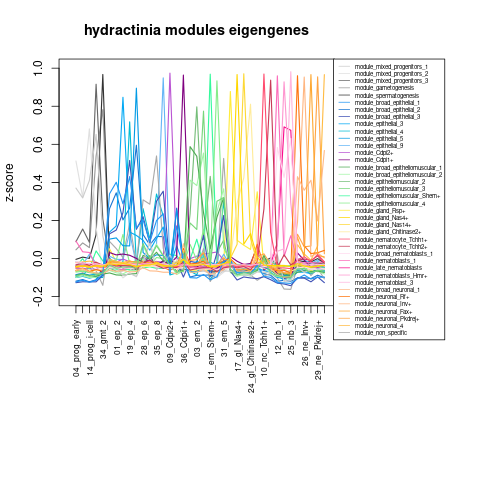

In [ ]:
%%R
par(
  mar=c(12,4,4,10)+0.1, xpd = TRUE
)
plot(
  1,
  type = "n",
  xlab = "",
  ylab = "z-score",
  ylim = c(-0.2, 1),
  xlim = c(0, 38),
  main = "hydractinia modules eigengenes",
  xaxt = "n"
)
axis(
  side=1,
  at = 1:38,
  labels = colnames(hysim_cpm)[1:38],
  las = 2,
  cex.axis = 0.7,
  xlab="cell type clusters"
)
for (i in 1:nrow(hysim_eigengenes)) {
  col_i <- hysim_modules_table$newcolor[
    hysim_modules_table$wgcna_color == rownames(hysim_eigengenes)[i]
    ]
  lines(c(1:38),
        hysim_eigengenes[i, 1:38],
        type = "l",
        col = col_i,
        lwd=1.5)
}
legend(
  x = "topright",
  legend = hysim_modules_table$module_humanfriendly,
  inset = c(-0.4,0),
  lty = 1,
  col = hysim_modules_table$newcolor,
  ncol = 1,
  cex = 0.5
)

In [ ]:
%%R
hysim_wg_viz <- merge(
  t(datExpr),
  hysim_id_module,
  by.x = 0,
  by.y = 1,
  all.y = T
  ) %>%
  column_to_rownames("Row.names") %>%
  arrange(module)

In [ ]:
%%R
head(hysim_wg_viz)

  04_prog_early 08_prog_mixed 14_prog_i-cell 06_gmt_1   34_gmt_2      00_ep_1
1      2.264365      1.421067       2.547304 3.786886  1.8531126 -0.366092784
2      1.927100      0.566471       1.629024 3.382842  2.5219933 -0.366553211
3      1.692589      1.740881       3.430903 3.418282 -0.2901803 -0.055047928
4      1.976903      2.980152       0.701604 2.868587  1.6789327 -0.002387998
5      1.288869      1.301644       1.430378 3.861825  2.8817847  0.042434597
6      1.273983      1.195356       3.730970 2.787058  1.3400481  0.099624206
      01_ep_2    07_ep_3    19_ep_4    23_ep_5    28_ep_6   30_ep_7    35_ep_8
1 -0.44784090 -0.5248356 -0.6036943 -0.4247872 -0.4233756 0.2590232  0.1308582
2  0.03627044 -0.6393075 -0.1767217 -0.6967041 -0.6967041 0.2451779 -0.6967041
3 -0.41692467 -0.8373809 -0.5881179 -0.8683089  0.1924929 0.4005169  0.4280866
4 -0.21468958 -0.4825537 -0.2357960 -0.6047217 -0.6047217 0.3976712 -0.6047217
5 -0.10859285 -0.4031912 -0.2800001 -0.4798816  0.7071142 1

R[write to console]: `use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

R[write to console]: 'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



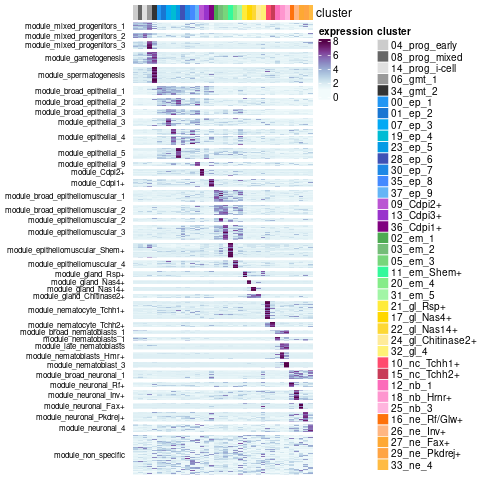

In [ ]:
%%R
hysim_ha_clu <- hysim_ctypes_col$col
names(hysim_ha_clu) <- hysim_ctypes_col$cluster

clu_ha = HeatmapAnnotation(
  name = "cell types",
  cluster = hysim_ctypes_col$cluster,
  col = list( cluster = hysim_ha_clu )
  )


set.seed(4343)
Heatmap(
  na.omit(hysim_wg_viz[,1:38]+2),
  name = "expression",
  cluster_rows= F,
  show_row_names = F,
  show_row_dend = F,
  cluster_columns = F,
  show_column_names = F,
  row_split = hysim_wg_viz$module,
  row_title_gp = gpar(fontsize = 8),
  row_title_rot = 0,
  col = rev(sequential_hcl(10,"BuPu")),
  top_annotation=clu_ha,
  heatmap_legend_param = gpar(nrow = 2)
)


In [ ]:
%%R
modules_clusters <- Heatmap(
  na.omit(hysim_wg_viz[,1:38]+2),
  name = "expression",
  cluster_rows= F,
  show_row_names = F,
  show_row_dend = F,
  cluster_columns = F,
  show_column_names = F,
  row_split = hysim_wg_viz$module,
  row_title_gp = gpar(fontsize = 8),
  row_title_rot = 0,
  col = rev(sequential_hcl(10,"BuPu")),
  top_annotation=clu_ha,
  heatmap_legend_param = gpar(nrow = 2)
)

pdf(
  paste0(
   "./",
    fcha(),
    "_hysim_modules_clusters.pdf"
  ),
  he = 10,
  wi = 14
)
draw(modules_clusters)
dev.off()

R[write to console]: `use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

R[write to console]: 'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2 


#### Subsetting the non specific gene module and recluster

In [ ]:
%%R
hysim_wg_viz_non_spec <- hysim_wg_viz[hysim_wg_viz[,'module']== 'module_non_specific',]
head(hysim_wg_viz_non_spec)

     04_prog_early 08_prog_mixed 14_prog_i-cell   06_gmt_1   34_gmt_2
6685   0.897625341     0.9350279     2.01839973 -0.1186067 -0.9154437
6686   0.118022378     0.1404492    -0.11790286  0.1059188  0.9157314
6687  -0.829880078    -0.7998814    -0.80437876 -0.8382243 -0.5679009
6688  -0.361260932     0.2889711    -0.44241349 -0.3047061 -0.6803795
6689  -0.323841093     2.2434145     0.67323862 -0.6659026 -0.6659026
6690   0.003413459     0.8079183     0.06589602  0.9241545 -0.7108693
         00_ep_1    01_ep_2    07_ep_3     19_ep_4    23_ep_5     28_ep_6
6685 -0.08632915 -0.3785630 -0.5791142  0.10021142  0.2291049  0.23813590
6686 -0.14053443 -0.3712588 -0.3641088  0.55337725  0.4034515 -0.27741118
6687 -0.03183403  0.2208935  2.8799378  0.07599944  0.5621414  0.73220746
6688  0.44886069  0.7177822  0.3767171  0.59651774 -0.3206435  0.04476951
6689 -0.01413441  0.4193500  0.5238486 -0.66590261 -0.6659026  2.05458941
6690 -0.25720161  0.4222270 -0.4348245  0.12273674  0.2285270  3.0

In [ ]:
%%R
## Staircase plot
highest_val <- function(x){ # x: a vector of named values
  a = x - mean(x)
  b = which(a == max(a) )
  if(length(b) > 1) b = b[1]
  c = names(x)[b]
  return(c)
}
#To do it as a fold change
test <- t(
  apply(
    hysim_wg_viz_non_spec[,1:38],
    1,
    function(x){
      a = log(x/mean(x))
      a[is.infinite(a)] = 0
      return(a)
    }
  )
)

test[is.na(test)] <- 0

hysim_non_spec_genecol <-
  data.frame(
    id = rownames(test),
    ctype = apply(
      test,
      1,
      highest_val
    )
  )

hysim_non_spec_genecol$ctype <- factor(hysim_non_spec_genecol$ctype,levels = colnames(hysim_wg_viz_non_spec[,1:38]))

hysim_non_spec_genecol <- hysim_non_spec_genecol[order(hysim_non_spec_genecol$ctype),]

test <- test[match(hysim_non_spec_genecol$id,rownames(test)),]

In [ ]:
%%R
head(test)

     04_prog_early 08_prog_mixed 14_prog_i-cell 06_gmt_1 34_gmt_2  00_ep_1
6704      36.63740      36.63740       35.96274 36.63740 36.63740 34.67325
6708      38.06474      38.06474       37.85520 38.03786 38.06474 38.04617
6716      36.83845      36.83845       36.83845 36.41142  0.00000  0.00000
6814      37.85761      37.85761       37.85761 33.90442 37.85761  0.00000
6866      37.55386      37.55386       37.53795 37.55386 37.55386 37.55386
6870      37.13570      37.13570       37.10112 37.13570 37.13570 37.13570
      01_ep_2  07_ep_3  19_ep_4  23_ep_5  28_ep_6  30_ep_7  35_ep_8  37_ep_9
6704 35.62617 35.89691  0.00000 36.63740  0.00000  0.00000  0.00000  0.00000
6708 38.05448 38.06474 37.91942 38.06474 38.06474  0.00000 38.06474 36.85251
6716 36.32523  0.00000 34.66693  0.00000 36.83845 36.83845  0.00000 36.83845
6814 36.45015  0.00000  0.00000 37.85761 37.85761 37.85761 37.85761 37.85761
6866 37.54098 37.55386 37.55386 37.55386 37.34022 37.55386  0.00000 37.55386
6870 37.12879

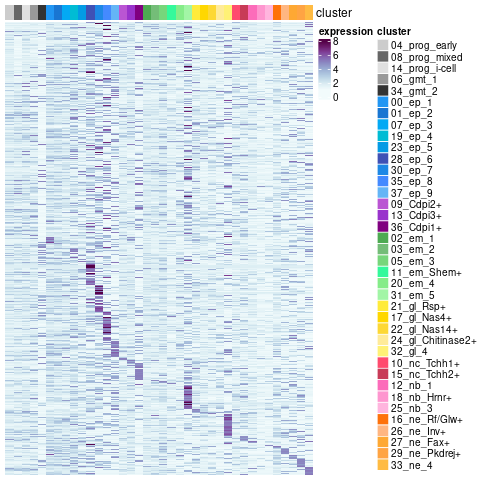

In [ ]:
%%R
hysim_ha_clu <- hysim_ctypes_col$col
names(hysim_ha_clu) <- hysim_ctypes_col$cluster

clu_ha = HeatmapAnnotation(
  name = "cell types",
  cluster = hysim_ctypes_col$cluster,
  col = list( cluster = hysim_ha_clu )
  )

set.seed(4343)
Heatmap(
  (hysim_wg_viz_non_spec[,1:38]+2),
  name = "expression",
  cluster_rows= F,
  show_row_names = F,
  show_row_dend = F,
  cluster_columns = F,
  show_column_names = F,
  row_title_gp = gpar(fontsize = 8),
  row_title_rot = 0,
  col = rev(sequential_hcl(10,"BuPu")),
  clustering_method_rows = 'ward.D2',
  top_annotation=clu_ha,
  heatmap_legend_param = gpar(nrow = 2),
  row_order= (rownames(hysim_non_spec_genecol))
)

#### Subsetting by the TFs in the curated list

In [ ]:
%%R
#Load the list of curated annotations for hydractinia and the cpms
hysim_tfs <- read.table('/mnt/sda/david/interpro_diamond_blast/hydractinia_only/20230725_hydractinia_TFs_curated.tsv',
                       header=T)[,1:2]
head(hysim_tfs)

            id       class
1 LOC130612065 Homeodomain
2 LOC130612084         ETS
3 LOC130612125         MYB
4 LOC130612189     zf_C2H2
5 LOC130612234         MYB
6 LOC130612244     zf_C2H2


In [ ]:
%%R
head(hysim_wg_viz)

  04_prog_early 08_prog_mixed 14_prog_i-cell 06_gmt_1   34_gmt_2      00_ep_1
1      2.264365      1.421067       2.547304 3.786886  1.8531126 -0.366092784
2      1.927100      0.566471       1.629024 3.382842  2.5219933 -0.366553211
3      1.692589      1.740881       3.430903 3.418282 -0.2901803 -0.055047928
4      1.976903      2.980152       0.701604 2.868587  1.6789327 -0.002387998
5      1.288869      1.301644       1.430378 3.861825  2.8817847  0.042434597
6      1.273983      1.195356       3.730970 2.787058  1.3400481  0.099624206
      01_ep_2    07_ep_3    19_ep_4    23_ep_5    28_ep_6   30_ep_7    35_ep_8
1 -0.44784090 -0.5248356 -0.6036943 -0.4247872 -0.4233756 0.2590232  0.1308582
2  0.03627044 -0.6393075 -0.1767217 -0.6967041 -0.6967041 0.2451779 -0.6967041
3 -0.41692467 -0.8373809 -0.5881179 -0.8683089  0.1924929 0.4005169  0.4280866
4 -0.21468958 -0.4825537 -0.2357960 -0.6047217 -0.6047217 0.3976712 -0.6047217
5 -0.10859285 -0.4031912 -0.2800001 -0.4798816  0.7071142 1

In [ ]:
%%R
datExpr_t<- t(datExpr)
hysim_tf_datExpr <-
  datExpr_t[
    rownames(datExpr_t) %in% hysim_tfs$id,
    1:38
    ]

colnames(hysim_tf_datExpr) <- colnames(datExpr_t)[1:38]

hysim_tf_datExpr <- as.data.frame(hysim_tf_datExpr)

In [ ]:
%%R
rownames(hysim_tf_datExpr[, 1:5], 5)
#head(hysim_tfs)

 [1] "LOC130612065" "LOC130612084" "LOC130612189" "LOC130612280" "LOC130612286"
 [6] "LOC130612468" "LOC130612631" "LOC130612651" "LOC130613068" "LOC130614359"
[11] "LOC130614371" "LOC130622096" "LOC130622157" "LOC130622413" "LOC130623795"
[16] "LOC130624060" "LOC130628817" "LOC130628828" "LOC130628919" "LOC130628938"
[21] "LOC130629469" "LOC130630247" "LOC130630551" "LOC130635445" "LOC130636423"
[26] "LOC130636720" "LOC130640666" "LOC130640996" "LOC130641220" "LOC130641239"
[31] "LOC130641244" "LOC130641420" "LOC130641741" "LOC130641782" "LOC130642115"
[36] "LOC130644600" "LOC130644782" "LOC130644829" "LOC130644875" "LOC130645449"
[41] "LOC130645615" "LOC130645652" "LOC130645675" "LOC130645721" "LOC130646075"
[46] "LOC130647355" "LOC130647702" "LOC130649021" "LOC130649615" "LOC130653750"
[51] "LOC130653927" "LOC130654006" "LOC130654881" "LOC130655133" "LOC130655227"
[56] "LOC130655367" "LOC130655441" "LOC130655612" "LOC130655813" "LOC130655816"
[61] "LOC130656417" "LOC130656845" "LOC1

In [ ]:
%%R
#dim(tf_wg_viz)
head(hysim_id_module)

            id               module
1 LOC130640763 module_gametogenesis
2 LOC130645325 module_gametogenesis
3 LOC130655461 module_gametogenesis
4 LOC130636360 module_gametogenesis
5 LOC130628811 module_gametogenesis
6 LOC130655187 module_gametogenesis


In [ ]:
%%R
tf_wg_viz <- merge(
  hysim_tf_datExpr,
  hysim_id_module,
  by.x = 0,
  by.y = 1
  ) %>%
  arrange(module)
rownames(tf_wg_viz) <- tf_wg_viz$Row.names
tf_wg_viz$Row.names <- NULL
head(tf_wg_viz)

             04_prog_early 08_prog_mixed 14_prog_i-cell 06_gmt_1    34_gmt_2
LOC130629469      2.825338      1.697441       2.462943 3.190436  0.16734842
LOC130636720      1.960006      1.613046       2.296513 4.098145  1.72889429
LOC130640996      1.390982      3.910460       1.815995 2.943067 -0.54618512
LOC130641782      3.434421      1.979406       2.680261 2.769278 -0.08406956
LOC130654881      2.041820      1.744371       1.273388 3.656168  3.00613524
LOC130657167      2.131030      2.462479       1.190869 3.665443  0.20228144
                00_ep_1    01_ep_2    07_ep_3     19_ep_4    23_ep_5    28_ep_6
LOC130629469 -0.5404916 -0.2883145 -0.4906540 -0.70420507 -0.8782452 -0.3497502
LOC130636720 -0.3899051 -0.3807450 -0.1554732 -0.55703644 -0.5538323 -0.3728286
LOC130640996 -0.1831259  0.1255107 -0.5461851 -0.54618512 -0.2955931  0.9692305
LOC130641782 -0.3104734 -0.2256794 -0.4710840  0.07041821 -0.5162203 -0.2246302
LOC130654881 -0.2224664 -0.2250214 -0.4542013 -0.16205255 -0.

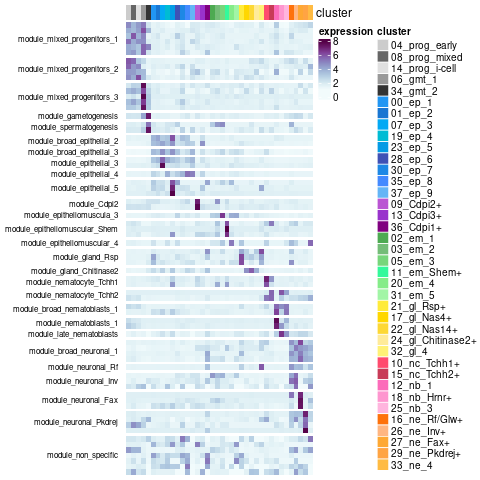

In [ ]:
%%R
hysim_ha_clu <- hysim_ctypes_col$col
names(hysim_ha_clu) <- hysim_ctypes_col$cluster

clu_ha = HeatmapAnnotation(
  name = "cell types",
  cluster = hysim_ctypes_col$cluster,
  col = list( cluster = hysim_ha_clu )
  )

set.seed(4343)
Heatmap(
  na.omit(tf_wg_viz[,1:38]+2),
  name = "expression",
  cluster_rows= F,
  show_row_names = F,
  show_row_dend = F,
  cluster_columns = F,
  show_column_names = F,
  row_split = tf_wg_viz$module,
  row_title_gp = gpar(fontsize = 8),
  row_title_rot = 0,
  col = rev(sequential_hcl(10,"BuPu")),
  top_annotation=clu_ha,
  heatmap_legend_param = gpar(nrow = 2)
)

In [ ]:
%%R
dim(tf_wg_viz)

[1] 69 39


In [ ]:
%%R
highlight_rows_gp <- function(row_names, highlighted_rows, default_gp, highlight_gp) {
  gp_list <- lapply(row_names, function(row_name) {
    if (row_name %in% highlighted_rows) {
      return(highlight_gp)
    } else {
      return(default_gp)
    }
  })
  return(gp_list)
}

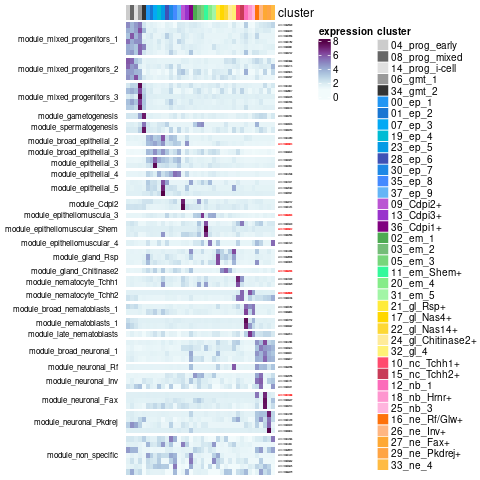

In [ ]:
%%R
hysim_ha_clu <- hysim_ctypes_col$col
names(hysim_ha_clu) <- hysim_ctypes_col$cluster

clu_ha = HeatmapAnnotation(
  name = "cell types",
  cluster = hysim_ctypes_col$cluster,
  col = list( cluster = hysim_ha_clu )
  )
#Staircase heatmap highlighting a set of rows
my_tfs <- c('LOC130655813', 'LOC130655612', 'LOC130662634',
            'LOC130662355', 'LOC130628828', 'LOC130613068')

# Function to define the graphical parameters for row names
highlight_rows_gp <- function(row_names, highlighted_rows) {
  gpar(
    fontsize = ifelse(row_names %in% highlighted_rows, 2.5, 2.5),
    col = ifelse(row_names %in% highlighted_rows, "red", "black"),
    fontface = ifelse(row_names %in% highlighted_rows, "bold", "plain")
  )
}
set.seed(4343)

hysim_tf_wg <-
Heatmap(
  na.omit(tf_wg_viz[,1:38]+2),
  name = "expression",
  cluster_rows= F,
  show_row_names = T,
  show_row_dend = F,
  cluster_columns = F,
  show_column_names = F,
  row_split = tf_wg_viz$module,
  row_title_gp = gpar(fontsize = 8),
  row_title_rot = 0,
  col = rev(sequential_hcl(10,"BuPu")),
  top_annotation=clu_ha,
  heatmap_legend_param = gpar(nrow = 2),
  row_order= (rownames(tf_wg_viz)),
  row_names_gp = highlight_rows_gp(row_names = rownames(tf_wg_viz), highlighted_rows = my_tfs)
)
draw(hysim_tf_wg)

In [ ]:
%%R
pdf(
  paste0(
   "./",
    fcha(),
    "_hysim_tfs_modules_clusters.pdf"
  ),
  he = 10,
  wi = 14
)
draw(hysim_tf_wg)
dev.off()

png 
  2 


### Save specific R objects in a .rda file  

In [ ]:
%%R
save(
    hysim_cpm,
    hysim_ctypes_col,
    hysim_id_module_wgcna,
    cv_input_wgcna,
    hysim_wg_viz,
    diss1,
    datExpr,
    sampleTree,
    geneTree,
    dissTOM,
    TOM,
    TOM_2,
    moduleColors,
    hysim_id_module_kME,
    hysim_eigengenes,
    datKME,
    MEList,
    MEs,
    sft,
    clu_ha,
    cooc_hmap,
    hysim_wg_GO_all,
    hysim_wg_GO_table,
    file="./20230817_wgcna_analysis.rda"
    )